<p style="font-size:26px;text-align:center"> <b>HEALTHCARE PROVIDER FRAUD DETECTION ANALYSIS </b> </p>

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://www.kaggle.com/rohitrox/healthcare-provider-fraud-detection-analysis </p>
<p> Data: Medicare IP, OP & Benificiaries data</p>
<p> Download training and test data from Kaggle</p> 

<h6> Problem statement : </h6>
<p> Given Inpatient, Outpatient and Beneficiary details of providers, we try to build out the optimized ML Model to predict the potentially fraudulent providers. Identify the fraudulent patterns in the provider claims. </p>

<h2>1.2. Source/Useful Links</h2>

Some articles and reference blogs about the problem statement

https://www.researchgate.net/profile/Rohan-Gupta-5/publication/350132738_A_Comparative_Study_of_Using_Various_Machine_Learning_and_Deep_Learning-Based_Fraud_Detection_Models_For_Universal_Health_Coverage_Schemes/links/605d6e21a6fdccbfea085b79/A-Comparative-Study-of-Using-Various-Machine-Learning-and-Deep-Learning-Based-Fraud-Detection-Models-For-Universal-Health-Coverage-Schemes.pdf

https://www.datasciencecentral.com/profiles/blogs/deep-learning-detecting-fraudulent-healthcare-provider-using

<h2>1.3. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

* Inpatient Data – Patients who admitted in hospitals more than 24 hours and taking treatment, considered as Inpatient. It contains follow fields:
    * BeneID – Patient Unique ID
    * ClaimID – Claim ID. Filing the services performed by physicians to get the payment from Insurance company. 
    * ClaimstartDt - Claim keyed date
    * ClaimendDt – Claim closed date
    * Provider - Provider Unique Identification number. It can be a hospital, a clinic or an individual physician ID.
    * InscClaimAmtReimbursed – Amount that covered and paid by Insurance company to provider
    * AttendingPhysician – A medical doctor who is responsible for the overall care of a patient in a hospital or clinic.
    * OperatingPhysician – The surgeon who actual does the operation
    * OtherPhysician – It can be a secondary physician for the overall care of a patient in a hospital or clinic.
    * AdmissionDT - Date when patient got admitted in a hospital for treatment.
    * ClmAdmitDiagnosisCode – Patient initial diagnosis at admission.
    * DeductibleAmtPaid - The amount you pay for covered services prior to your benefit plan starts to pay. It’s based-on   benefit plan and it mostly pays once in a year.
    * DischargeDt – Date when patient got discharged from the hospital
    * DiagnosisGroupCode – The Code of which classifies hospital cases to certain group, which are expected to have similar hospital resource use (cost)
    * ClmDiagnosisCode_1 to 10 – The Unique code which denotes the nature of illness. Example: Fever, Cancer...etc.
    * ClmProcedureCode_1 to 6 – The Unique code which denotes the services/methods given to the diagnosis. Example: Injection, X-ray...etc.


* Outpatient data - Patients who visit hospitals and not admitted in it. It contains follow fields:

    * BeneID – Patient Unique ID 
    * ClaimID – Claim ID. Filing the services performed by physicians to get the payment from Insurance company. 
    * ClaimstartDt - Claim keyed date
    * ClaimendDt – Claim closed date
    * Provider - Provider Unique Identification number. It can be a hospital, a clinic or an individual physician ID.
    * InscClaimAmtReimbursed – Amount that covered and paid by Insurance company to provider
    * AttendingPhysician – A medical doctor who is responsible for the overall care of a patient in a hospital or clinic.
    * OperatingPhysician – the surgeon who actual does the operation
    * OtherPhysician – It can be a secondary physician for the overall care of a patient in a hospital or clinic.
    * ClmDiagnosisCode_1 to 10 – The Unique code which denotes the nature of illness. Example: Fever, Cancer...etc.
    * ClmProcedureCode_1 to 6 – The Unique code which denotes the services/methods given to the diagnosis. Example: Injection, X-ray...etc.
    * ClmAdmitDiagnosisCode – Patient initial diagnosis at admission.
    * DeductibleAmtPaid - The amount you pay for covered services prior to your benefit plan

* Beneficiary Data - The basic details of the patients like health condition, state they belong to etc.

    * BeneID – Patient Unique ID 
    * DOB – Patients Date of Birth
    * DOD – Patient Dead/died date of disease
    * Gender – Sex code 
    * Race – The racial or ethnic background of a person
    * RenalDiseaseIndicator – Indicator to denotes if patient has renal disease or not
    * State – State they belong to
    * County – County region they belong to
    * NoOfMonths_PartACov – No of months that patient has coverage in Medicare Part A
    * NoOfMonths_PartBCov – No of months that patient has coverage in Medicare Part B
    * ChronicCond (Disease name) – It’s a human health condition on Chronic diseases such as heart disease, cancer, and diabetes are the leading causes of death and disability.
    * IPAnnualReimbursementAmt – In Patient Annual Reimbursement Amount
    * IPAnnualDeductibleAmt - In Patient Annual Deductible Amount
    * OPAnnualReimbursementAmt – Out Patient Annual Reimbursement Amount
    * OPAnnualDeductibleAmt - Out Patient Annual Reimbursement Amount


<h3>2.1.2. Example Data Point</h3>

<h6>Train_Inpatientdata</h6>

* Inpatient Data
BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDT,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6

BENE11001,CLM46614,12-04-2009,18-04-2009,PRV55912,26000	PHY390922,NA,NA,12-04-2009,7866,1068,18-04-2009,201,1970,4019,5853,	7843,2768,71590,2724,19889,5849,NA,NA,NA,NA,NA,NA,NA

<h6>Train_Outpatientdata</h6>

* Outpatient Data
BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode

BENE11004,CLM322683,25-04-2009,15-05-2009,PRV56011,60,PHY372925,NA,PHY311407,71856,7265,V1254,7295,72751,4019,9597,8449,71596,	NA,NA,NA,NA,NA,NA,NA

<h6>Train_Beneficiarydata</h6>

* Beneficiarydata
BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt

BENE11001,01-01-1943,NA,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70


<h6>Train</h6>

* Traindata

Provider,PotentialFraud

PRV51001,No

PRV51003,Yes


<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

Binary classification problem 

<h3>2.2.2. Performance Metric</h3>

Metric(s):

* precision and recall
* F1 Score
* AUC & Accuracy 

<h1>3. Exploratory Data Analysis</h1>

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
import math
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
import matplotlib.patches as mpatches
from datetime import date
import plotly.offline as offline
import plotly.graph_objs as go
import scipy.stats as ss
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
from numpy import nan
offline.init_notebook_mode()
warnings.filterwarnings("ignore")


<h2>3.1. Reading Data</h2>

<h3>3.1.1 Reading IP, OP and Beneficiaries Data</h3>

In [13]:
IPdata = pd.read_csv('C:/Users/Muru/Downloads/Train_Inpatientdata.csv')
OPdata = pd.read_csv('C:/Users/Muru/Downloads/Train_Outpatientdata.csv')
Bendata = pd.read_csv('C:/Users/Muru/Downloads/Train_Beneficiarydata.csv')
frauddata = pd.read_csv('C:/Users/Muru/Downloads/Train_fraudulentlabel.csv')

In [14]:
print("No of data points in Inpatient data: ",IPdata.shape)
print("No of data points in Outpatient data: ",OPdata.shape)
print("No of data points in Beneficiaries data: ",Bendata.shape)
print("No of data points in Fraudluent data: ",frauddata.shape)

No of data points in Inpatient data:  (40474, 30)
No of data points in Outpatient data:  (517737, 27)
No of data points in Beneficiaries data:  (138556, 25)
No of data points in Fraudluent data:  (5410, 2)


<h3>3.1.2 Converting yes/no to 1/0 on provider fraudulent data</h3>

In [15]:
fraudlabel = list()
for i, j in frauddata.iterrows():
    if j.PotentialFraud == 'Yes':
        fraudlabel.append(1)
    else:
        fraudlabel.append(0)
    

In [16]:
frauddata['providerfraudlabel'] = fraudlabel

<h3>3.1.3 Merging Beneficiaries data & Adding fraudulent provider label with IP data based on provider ID & BeneID</h3>

In [17]:
# join two dataframes in python: 
IPdata = pd.merge(IPdata, Bendata.drop(['OPAnnualReimbursementAmt','OPAnnualDeductibleAmt'], axis=1), on='BeneID', how='left')
IPdata = pd.merge(IPdata, frauddata, on='Provider', how='left')
IPdata

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0       BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1       BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   
2       BENE11001  CLM68358   2009-09-17  2009-09-20  PRV56046   
3       BENE11011  CLM38412   2009-02-14  2009-02-22  PRV52405   
4       BENE11014  CLM63689   2009-08-13  2009-08-30  PRV56614   
...           ...       ...          ...         ...       ...   
40469  BENE159167  CLM69886   2009-09-28  2009-10-02  PRV53671   
40470  BENE159175  CLM74504   2009-11-03  2009-11-06  PRV54981   
40471  BENE159177  CLM76485   2009-11-18  2009-11-22  PRV56588   
40472  BENE159177  CLM79949   2009-12-17  2009-12-18  PRV56575   
40473  BENE159188  CLM69948   2009-09-28  2009-10-06  PRV54765   

       InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                       26000          PHY390922                NaN   
1                        5000          PHY318495          PHY318495   
2                        5000          PHY372395                NaN   
3                        5000          PHY369659          PHY392961   
4                       10000          PHY379376          PHY398258   
...                       ...                ...                ...   
40469                    7000          PHY345332          PHY319565   
40470                    4000          PHY342806          PHY365497   
40471                    3000          PHY423220          PHY332752   
40472                    5000          PHY353156                NaN   
40473                   15000          PHY431177          PHY352941   

      OtherPhysician AdmissionDt  ... ChronicCond_Depression  \
0                NaN  2009-04-12  ...                      1   
1                NaN  2009-08-31  ...                      1   
2          PHY324689  2009-09-17  ...                      1   
3          PHY349768  2009-02-14  ...                      1   
4                NaN  2009-08-13  ...                      1   
...              ...         ...  ...                    ...   
40469            NaN  2009-09-28  ...                      2   
40470            NaN  2009-11-03  ...                      2   
40471            NaN  2009-11-18  ...                      1   
40472            NaN  2009-12-17  ...                      1   
40473            NaN  2009-09-28  ...                      2   

       ChronicCond_Diabetes ChronicCond_IschemicHeart  \
0                         1                         1   
1                         1                         1   
2                         1                         1   
3                         1                         2   
4                         2                         1   
...                     ...                       ...   
40469                     2                         1   
40470                     2                         1   
40471                     1                         1   
40472                     1                         1   
40473                     1                         1   

      ChronicCond_Osteoporasis ChronicCond_rheumatoidarthritis  \
0                            2                               1   
1                            2                               1   
2                            2                               1   
3                            2                               1   
4                            2                               2   
...                        ...                             ...   
40469                        2                               1   
40470                        2                               2   
40471                        1                               1   
40472                        1                               1   
40473                        2                               2   

      ChronicCond_stroke IPAnnualReimbursementAmt IPAnnualDeductibleAmt  \
0                      1                   

<h3>3.1.4 Merging Beneficiaries data & Adding fraudulent provider label with OP data based on provider ID & BeneID</h3>

In [18]:
OPdata = pd.merge(OPdata, Bendata.drop(['IPAnnualReimbursementAmt','IPAnnualDeductibleAmt'], axis=1), on='BeneID', how='left')
OPdata = pd.merge(OPdata, frauddata, on='Provider', how='left')
OPdata

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0        BENE11002  CLM624349   2009-10-11  2009-10-11  PRV56011   
1        BENE11003  CLM189947   2009-02-12  2009-02-12  PRV57610   
2        BENE11003  CLM438021   2009-06-27  2009-06-27  PRV57595   
3        BENE11004  CLM121801   2009-01-06  2009-01-06  PRV56011   
4        BENE11004  CLM150998   2009-01-22  2009-01-22  PRV56011   
...            ...        ...          ...         ...       ...   
517732  BENE159198  CLM510792   2009-08-06  2009-08-06  PRV53699   
517733  BENE159198  CLM551294   2009-08-29  2009-08-29  PRV53702   
517734  BENE159198  CLM596444   2009-09-24  2009-09-24  PRV53676   
517735  BENE159198  CLM636992   2009-10-18  2009-10-18  PRV53689   
517736  BENE159198  CLM686139   2009-11-17  2009-11-18  PRV53689   

        InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                           30          PHY326117                NaN   
1                           80          PHY362868                NaN   
2                           10          PHY328821                NaN   
3                           40          PHY334319                NaN   
4                          200          PHY403831                NaN   
...                        ...                ...                ...   
517732                     800          PHY364188          PHY364188   
517733                     400          PHY423019          PHY332284   
517734                      60          PHY361063                NaN   
517735                      70          PHY403198                NaN   
517736                      80          PHY419379                NaN   

       OtherPhysician ClmDiagnosisCode_1  ... ChronicCond_Depression  \
0                 NaN              78943  ...                      2   
1                 NaN               6115  ...                      2   
2                 NaN               2723  ...                      2   
3                 NaN              71988  ...                      2   
4                 NaN              82382  ...                      2   
...               ...                ...  ...                    ...   
517732      PHY385752               2163  ...                      1   
517733            NaN              07041  ...                      1   
517734            NaN               V570  ...                      1   
517735      PHY419379                NaN  ...                      1   
517736      PHY419379              78900  ...                      1   

       ChronicCond_Diabetes ChronicCond_IschemicHeart  \
0                         2                         2   
1                         2                         1   
2                         2                         1   
3                         1                         1   
4                         1                         1   
...                     ...                       ...   
517732                    1                         2   
517733                    1                         2   
517734                    1                         2   
517735                    1                         2   
517736                    1                         2   

       ChronicCond_Osteoporasis ChronicCond_rheumatoidarthritis  \
0                             2                               2   
1                             2                               2   
2                             2                               2   
3                             1                               1   
4                             1                               1   
...                         ...                             ...   
517732                        2                               1   
517733                        2                               1   
517734                        2                               1   
517735                        2                               1   
517736                        2            

<h2>3.2 Preprocessing</h2>

<h3>3.2.1 Replacing NaN - Missing values into 0 in IP & OP data</h3>

In [19]:
IPdata = IPdata.replace(np.nan, int(0))
OPdata = OPdata.replace(np.nan, int(0))

<h3>3.2.2 New Feature -  Extracting Diagnosis code descriptions from IP & OP claims diagnosis codes </h3>

In [20]:
# International Statistical Classification of Diseases and Related Health Problems (ICD), a medical classification list by the World Health Organization
# There is an unique ICD codes for each disease. 
# As we given ClmDiagnosisCode_1 to 10 - 10 diagnosis code for each claims. We are extracting the description of the diagnosis code.
# Extraction of the diagnosis desciption can be done using icd9.cms pre-defined library
# Example : search('Diagnosis code#') -> returns the desc - search('4019') -> 4019:Hypertension NOS:Unspecified essential hypertension
from icd9cms.icd9 import search
from tqdm import tqdm

def fetch_diagnosis_des(df, n):
    diadesc = list()
    for i,j in tqdm(df.iterrows()):
        tempstr = ''
        for k in range(10):
            if j[k] != 0:
                try:
                    code = search(j[k])
                    code = str(code)
                    tempstr = tempstr + " " + code.split(":")[2]
                except:
                    continue
            else:
                continue
        diadesc.append(tempstr)
        
    return diadesc

<h3>3.2.2.1 New Feature -  Extracting Diagnosis code descriptions from IP claims diagnosis codes </h3>

In [21]:
diagnosisfields = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10']
IPDiagnosisDesc = fetch_diagnosis_des(IPdata[diagnosisfields], 10)

40474it [00:11, 3628.82it/s]


<h3>3.2.2.2 New Feature -  Extracting Diagnosis code descriptions from OP claims diagnosis codes </h3>

In [22]:
OPDiagnosisDesc = fetch_diagnosis_des(OPdata[diagnosisfields], 10)

517737it [01:55, 4478.38it/s]


<h3>3.2.2.3 New Feature -  Preprocessing of Diagnosis code descriptions for IP & OP claims diagnosis codes </h3>

In [23]:
# Decontractions, replace words like below to full words - https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [24]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'

stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [25]:
from bs4 import BeautifulSoup

# Combining all the above steps 
def preprocessing(textdata):
    codedescrib = list()
    for sentance in tqdm(textdata):
        sentance = BeautifulSoup(sentance, 'lxml').get_text()
        sentance = decontracted(sentance)
        #remove words with numbers python: https://stackoverflow.com/a/18082370/4084039
        sentance = re.sub("\S*\d\S*", "", sentance).strip()
        #remove spacial character: https://stackoverflow.com/a/5843547/4084039
        sentance = re.sub('[^A-Za-z]+', ' ', sentance)
        # https://gist.github.com/sebleier/554280
        sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
        codedescrib.append(sentance.strip())
    return codedescrib

<h3>3.2.2.3.1 New Feature -  Preprocessing of Diagnosis code descriptions for IP claims diagnosis codes </h3>

In [26]:
IPPreproDia = preprocessing(IPDiagnosisDesc)

100%|██████████████████████████████████████████████████████████████████████████| 40474/40474 [00:09<00:00, 4168.38it/s]


In [27]:
IPPreproDia[:10]

['secondary malignant neoplasm lung unspecified essential hypertension chronic kidney disease stage iii moderate aphasia hypopotassemia osteoarthrosis unspecified whether generalized localized site unspecified unspecified hyperlipidemia secondary malignant neoplasm specified sites acute kidney failure unspecified',
 'vaginal enterocele congenital acquired persistent mental disorders due conditions classified elsewhere constipation unspecified',
 'major depressive affective disorder single episode severe without mention psychotic behavior unspecified alcohol dependence unspecified arthropathy unspecified site unspecified epilepsy unspecified without mention intractable epilepsy personal history noncompliance medical treatment presenting hazards health obstructive sleep apnea adult pediatric',
 'cerebral artery occlusion unspecified cerebral infarction acidosis aphasia obstructive sleep apnea adult pediatric personal history malignant neoplasm cervix uteri primary cardiomyopathies diabet

<h3>3.2.2.3.2 New Feature -  Preprocessing of Diagnosis code descriptions for OP claims diagnosis codes </h3>

In [28]:
OPPreproDia = preprocessing(OPDiagnosisDesc)

100%|████████████████████████████████████████████████████████████████████████| 517737/517737 [01:53<00:00, 4568.97it/s]


<h3>3.2.2.3.3 New Feature -  Inserting Preprocessing of Diagnosis code descriptions into IP & OP dataframe </h3>

In [29]:
IPdata['IPDiagnsisDesc'] = IPPreproDia
OPdata['OPDiagnsisDesc'] = OPPreproDia

<h3>3.2.3 Check if there is any duplicate rows in IP dataframe</h3>

In [30]:
dupl = IPdata[IPdata.duplicated()]
dupl

Empty DataFrame
Columns: [BeneID, ClaimID, ClaimStartDt, ClaimEndDt, Provider, InscClaimAmtReimbursed, AttendingPhysician, OperatingPhysician, OtherPhysician, AdmissionDt, ClmAdmitDiagnosisCode, DeductibleAmtPaid, DischargeDt, DiagnosisGroupCode, ClmDiagnosisCode_1, ClmDiagnosisCode_2, ClmDiagnosisCode_3, ClmDiagnosisCode_4, ClmDiagnosisCode_5, ClmDiagnosisCode_6, ClmDiagnosisCode_7, ClmDiagnosisCode_8, ClmDiagnosisCode_9, ClmDiagnosisCode_10, ClmProcedureCode_1, ClmProcedureCode_2, ClmProcedureCode_3, ClmProcedureCode_4, ClmProcedureCode_5, ClmProcedureCode_6, DOB, DOD, Gender, Race, RenalDiseaseIndicator, State, County, NoOfMonths_PartACov, NoOfMonths_PartBCov, ChronicCond_Alzheimer, ChronicCond_Heartfailure, ChronicCond_KidneyDisease, ChronicCond_Cancer, ChronicCond_ObstrPulmonary, ChronicCond_Depression, ChronicCond_Diabetes, ChronicCond_IschemicHeart, ChronicCond_Osteoporasis, ChronicCond_rheumatoidarthritis, ChronicCond_stroke, IPAnnualReimbursementAmt, IPAnnualDeductibleAmt, PotentialFraud, providerfraudlabel, IPDiagnsisDesc]
Index: []

[0 rows x 55 columns]

<h3>3.2.4 Check if there is any duplicate rows in OP dataframe</h3>

In [31]:
dupl = OPdata[OPdata.duplicated()]
dupl

Empty DataFrame
Columns: [BeneID, ClaimID, ClaimStartDt, ClaimEndDt, Provider, InscClaimAmtReimbursed, AttendingPhysician, OperatingPhysician, OtherPhysician, ClmDiagnosisCode_1, ClmDiagnosisCode_2, ClmDiagnosisCode_3, ClmDiagnosisCode_4, ClmDiagnosisCode_5, ClmDiagnosisCode_6, ClmDiagnosisCode_7, ClmDiagnosisCode_8, ClmDiagnosisCode_9, ClmDiagnosisCode_10, ClmProcedureCode_1, ClmProcedureCode_2, ClmProcedureCode_3, ClmProcedureCode_4, ClmProcedureCode_5, ClmProcedureCode_6, DeductibleAmtPaid, ClmAdmitDiagnosisCode, DOB, DOD, Gender, Race, RenalDiseaseIndicator, State, County, NoOfMonths_PartACov, NoOfMonths_PartBCov, ChronicCond_Alzheimer, ChronicCond_Heartfailure, ChronicCond_KidneyDisease, ChronicCond_Cancer, ChronicCond_ObstrPulmonary, ChronicCond_Depression, ChronicCond_Diabetes, ChronicCond_IschemicHeart, ChronicCond_Osteoporasis, ChronicCond_rheumatoidarthritis, ChronicCond_stroke, OPAnnualReimbursementAmt, OPAnnualDeductibleAmt, PotentialFraud, providerfraudlabel, OPDiagnsisDesc]
Index: []

[0 rows x 52 columns]

<h3>3.2.5 Replacing RenalDiseaseIndicator value 'Y' into 1 in IP & OP data</h3>

In [32]:
IPdata[['RenalDiseaseIndicator']] = IPdata[['RenalDiseaseIndicator']].replace('Y', int(1))
OPdata[['RenalDiseaseIndicator']] = OPdata[['RenalDiseaseIndicator']].replace('Y', int(1))

<h3>3.2.6 Set 1 if patient has DOD date in IP & OP data</h3>

In [33]:
# Set 1 if patient has DOD date
IPdod = list()
for i, j in IPdata.iterrows():
    if j.DOD != 0:
        IPdod.append(1)
    else:
        IPdod.append(0)

OPdod = list()
for i, j in OPdata.iterrows():
    if j.DOD != 0:
        OPdod.append(1)
    else:
        OPdod.append(0)

In [34]:
IPdata['IPDODind'] = IPdod
OPdata['OPDODind'] = OPdod

<h3>3.2.7 Converting Beneficiaries DOB into Age as of 2009 on IP & OP data</h3>

In [35]:
# Calculating the difference between ClaimStartDt & ClaimEndDt, to find the treatment days
IPpatage = list()
for i, j in IPdata.iterrows():
    temp = j.DOB.split("-")[0]
    IPpatage.append(2009 - int(temp))

OPpatage = list()
for i, j in OPdata.iterrows():
    temp = j.DOB.split("-")[0]
    OPpatage.append(2009 - int(temp))

In [36]:
IPdata['IPPatientage'] = IPpatage
OPdata['OPPatientage'] = OPpatage

<h3>3.2.8 New feature - Calculating total treatment days & adding them with IP and OP data</h3>

In [37]:
# Calculating the difference between ClaimStartDt & ClaimEndDt, to find the treatment days
clmdatediff = list()
for i, j in IPdata.iterrows():
    temp = j.ClaimStartDt.split("-")
    temp1 = j.ClaimEndDt.split("-")
    d0 = date(int(temp[0]), int(temp[1]), int(temp[2]))
    d1 = date(int(temp1[0]), int(temp1[1]), int(temp1[2]))
    delta = d1 - d0
    clmdatediff.append(delta.days)

opclmdatediff = list()
for i, j in OPdata.iterrows():
    temp = j.ClaimStartDt.split("-")
    temp1 = j.ClaimEndDt.split("-")
    d0 = date(int(temp[0]), int(temp[1]), int(temp[2]))
    d1 = date(int(temp1[0]), int(temp1[1]), int(temp1[2]))
    delta = d1 - d0
    opclmdatediff.append(delta.days)

In [38]:
IPdata['IPtreatmentdays'] = clmdatediff
OPdata['OPtreatmentdays'] = opclmdatediff

<h3>3.2.9 New feature - Fetching treatment month alone from ClaimEndDt on IP and OP data</h3>

In [39]:
# Splitting ClaimEndDt, and fetching only treament month
IPmonthclmend = list()
for i, j in IPdata.iterrows():
    temp = j.ClaimEndDt.split("-")[1]
    IPmonthclmend.append(int(temp))

OPmonthclmend = list()
for i, j in OPdata.iterrows():
    temp = j.ClaimEndDt.split("-")[1]
    OPmonthclmend.append(int(temp))

In [40]:
IPdata['IPtreatmentmonth'] = IPmonthclmend
OPdata['OPtreatmentmonth'] = OPmonthclmend

<h3>3.2.10 New feature - Fetching last treatment date alone from ClaimEndDt on IP and OP data</h3>

In [41]:
# Splitting ClaimEndDt, and fetching only treament date
IPdateclmend = list()
for i, j in IPdata.iterrows():
    temp = j.ClaimEndDt.split("-")[2]
    IPdateclmend.append(int(temp))

OPdateclmend = list()
for i, j in OPdata.iterrows():
    temp = j.ClaimEndDt.split("-")[2]
    OPdateclmend.append(int(temp))

In [42]:
IPdata['IPtreatmentdate'] = IPdateclmend
OPdata['OPtreatmentdate'] = OPdateclmend

<h3>3.2.11 New feature - Calculating number of Diagnosis code in IP & OP data</h3>

In [43]:
def no_of_diagnosis(df, n):
    noofdia = list()
    for i, j in df.iterrows():
        tempcount = 0
        for k in range(n):
            if j[k] != 0:
                tempcount += 1
            else:
                continue
        noofdia.append(tempcount)
    return noofdia

In [44]:
# calling no_of_diagnosis where we calculate the no of diagnosis code
diagnosisfields = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10']
IPnoofdia = no_of_diagnosis(IPdata[diagnosisfields], 10)
OPnoofdia = no_of_diagnosis(OPdata[diagnosisfields], 10)

In [45]:
# Adding no_of_diagnosis in IP & OP data
IPdata['IPNoofDigcode'] = IPnoofdia
OPdata['OPNoofDigcode'] = OPnoofdia

<h3>3.2.12 New feature - Calculating number of Procedure code in IP & OP data</h3>

In [46]:
# calling no_of_diagnosis where we calculate the no of procedure code
procedurefields = ['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5','ClmProcedureCode_6']
IPnoofproc = no_of_diagnosis(IPdata[procedurefields], 6)
OPnoofproc = no_of_diagnosis(OPdata[procedurefields], 6)

In [47]:
# Adding no_of_proccode in IP & OP data
IPdata['IPNoofProccode'] = IPnoofproc
OPdata['OPNoofProccode'] = OPnoofproc

<h3>3.2.13 New feature - Summation of all Chronic condition of diseases for IP & OP claims</h3>

In [48]:
def no_of_chronic(df, n):
    sumchronic = list()
    for i, j in df.iterrows():
        tempcount = 0
        for k in range(n):
            if j[k] != 0:
                tempcount += int(j[k])
            else:
                continue
        sumchronic.append(tempcount)
    return sumchronic

In [49]:
chronicdisease = ['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
                 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
                 'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']
IPsumchronic = no_of_chronic(IPdata[chronicdisease], 11)
OPsumchronic = no_of_chronic(OPdata[chronicdisease], 11)

In [50]:
# Adding sum of chronic cond of diseases into IP & OP data
IPdata['IPsumchronic'] = IPsumchronic
OPdata['OPsumchronic'] = OPsumchronic

<h3>3.2.13 Converting  State code to abbreviation code for IP & OP claims</h3>

In [51]:
import us

def state_abbr(df):
    stateabbr = list()
    tempstatelist = list()
    for i, j in df.iterrows():
        if j.State < 10:
            tempstatelist.append(str(us.states.lookup("0" + str(j.State))))
        else:
            tempstatelist.append(str(us.states.lookup(str(j.State))))
    
    for i in tempstatelist:
        try:
            state = us.states.lookup(i)
            abb = state.abbr
            stateabbr.append(abb)
        except:
            stateabbr.append('None')
    return stateabbr


In [52]:
IPStateAbbrev = state_abbr(IPdata)
OPStateAbbrev = state_abbr(OPdata)

In [53]:
IPdata['IPStateabb'] = IPStateAbbrev
OPdata['OPStateabb'] = OPStateAbbrev

### 3.2.14 Calculating No of physicians consulted for IP & OP claims

In [93]:
# Calculating no of physicians consulted
IPnoofphysicians = list()
for i, j in IPdata.iterrows():
    count = 0
    if j.AttendingPhysician != 0:
        count+= 1
    if j.OperatingPhysician != 0:
        count+= 1
    if j.OtherPhysician != 0:
        count+= 1
    IPnoofphysicians.append(count)

OPnoofphysicians = list()
for i, j in OPdata.iterrows():
    count = 0
    if j.AttendingPhysician != 0:
        count+= 1
    if j.OperatingPhysician != 0:
        count+= 1
    if j.OtherPhysician != 0:
        count+= 1
    OPnoofphysicians.append(count)

In [98]:
IPdata['IPnoofphysiciansconsulted'] = IPnoofphysicians
OPdata['OPnoofphysiciansconsulted'] = OPnoofphysicians

### Storing the IP & OP dataframe into pickle file

In [100]:
IPdata.to_pickle('C:/Users/Muru/Downloads/ipdatadf.pkl')
OPdata.to_pickle('C:/Users/Muru/Downloads/opdatadf.pkl')

In [2]:
IPdata = pd.read_pickle('C:/Users/Muru/Downloads/ipdatadf.pkl')
OPdata = pd.read_pickle('C:/Users/Muru/Downloads/opdatadf.pkl')

<h2>3.3 Data Analysis</h2>

### 3.3.1 Univariate - Analysis

#### 3.3.1.1 Count plot on potential fraudulent class

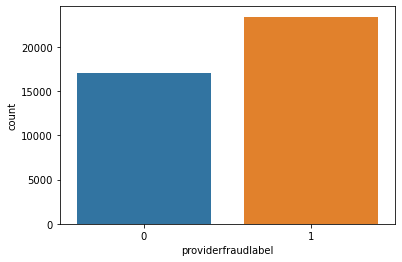

In [5]:
total = len(IPdata)*1
ax=sns.countplot(x="providerfraudlabel", data=IPdata)


In [23]:
for i in ax.patches:
    print(i.get_x)
ax.yaxis.set_ticks(np.linspace(0, total, 11))
print(ax.yaxis.get_majorticklocs())

<bound method Rectangle.get_x of <matplotlib.patches.Rectangle object at 0x00000176744BB430>>
<bound method Rectangle.get_x of <matplotlib.patches.Rectangle object at 0x00000176744BBC40>>
[     0.   51773.7 103547.4 155321.1 207094.8 258868.5 310642.2 362415.9
 414189.6 465963.3 517737. ]


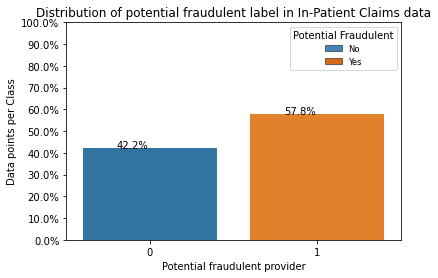

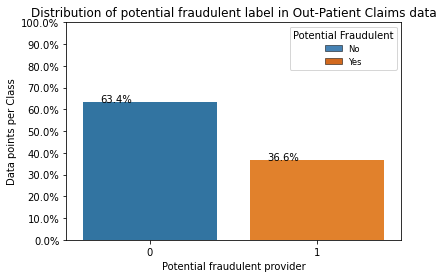

In [20]:
warnings.filterwarnings("ignore")
one = mpatches.Patch(facecolor='#4682B4',label='No', linewidth = 0.5, edgecolor = 'black')
two = mpatches.Patch(facecolor='#D2691E',label = 'Yes', linewidth = 0.5, edgecolor = 'black')

total = len(IPdata)*1
ax=sns.countplot(x="providerfraudlabel", data=IPdata)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.2, p.get_height()+5))

plt.legend(handles=[one, two], title="Potential Fraudulent",
                    loc=1, fontsize='small', fancybox=True)
#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.xlabel("Potential fraudulent provider")
plt.ylabel('Data points per Class')
plt.title("Distribution of potential fraudulent label in In-Patient Claims data")
plt.show()

total = len(OPdata)*1
ax=sns.countplot(x="providerfraudlabel", data=OPdata)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

plt.legend(handles=[one, two], title="Potential Fraudulent",
                    loc=1, fontsize='small', fancybox=True)
#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.xlabel("Potential fraudulent provider")
plt.ylabel('Data points per Class')
plt.title("Distribution of potential fraudulent label in Out-Patient Claims data")
plt.show()

#### Observation on count plot -

* More no of fraudulent cases filed for In- Patient claims. 
* There higher chances to provider to involve in fraud if its a In -patient claim

#### 3.3.1.2 How Deductible amounts are distributed and How good is this feature in predicting provider fraudulent status?

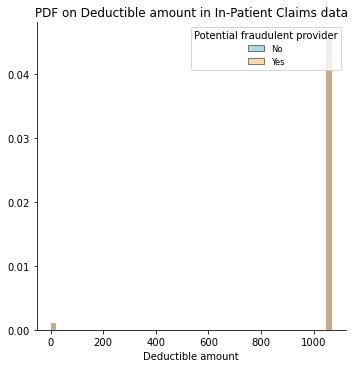

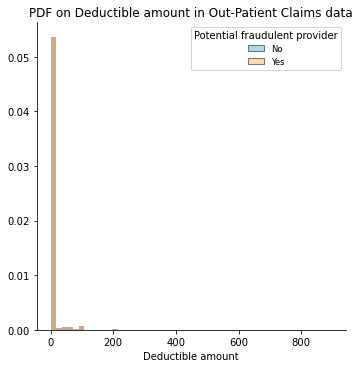

In [6]:
# PDF plot of Deductible amount on IP & OP claims
warnings.filterwarnings("ignore")
one = mpatches.Patch(facecolor='#add8e6',label='No', linewidth = 0.5, edgecolor = 'black')
two = mpatches.Patch(facecolor='#fed8b1',label = 'Yes', linewidth = 0.5, edgecolor = 'black')

sns.FacetGrid(IPdata,hue='providerfraudlabel',height=5).map(sns.distplot,"DeductibleAmtPaid");
plt.legend(handles=[one, two], title="Potential fraudulent provider",
                    loc=1, fontsize='small', fancybox=True)
plt.title("PDF on Deductible amount in In-Patient Claims data")
plt.xlabel("Deductible amount")
plt.show()

sns.FacetGrid(OPdata,hue='providerfraudlabel',height=5).map(sns.distplot,"DeductibleAmtPaid");
plt.legend(handles=[one, two], title="Potential fraudulent provider",
                    loc=1, fontsize='small', fancybox=True)
plt.title("PDF on Deductible amount in Out-Patient Claims data")
plt.xlabel("Deductible amount")
plt.show()

#### Observation - PDF on Deductible amount for In & Out patient claims

* Potential fraudulent status - Yes & No - perfectly overlapping on deductible amount
* No much distribution on deductible amount. 
* 1068 - constant Deductible amount for all In-patient claims.
* So, its not a useful feature for In-patient claims.

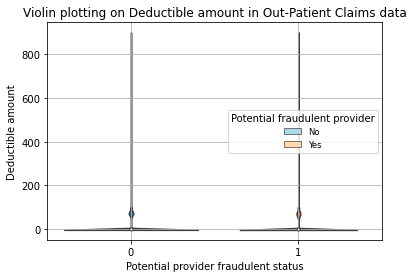

In [13]:
# Violin plot of Deductible amount on OP claims
sns.violinplot(x='providerfraudlabel',y='DeductibleAmtPaid', data=OPdata, size=10)
plt.grid()
plt.legend(handles=[one, two], title="Potential fraudulent provider",
                    loc=5, fontsize='small', fancybox=True)
plt.title("Violin plotting on Deductible amount in Out-Patient Claims data")
plt.xlabel("Potential provider fraudulent status")
plt.ylabel("Deductible amount")
plt.show()


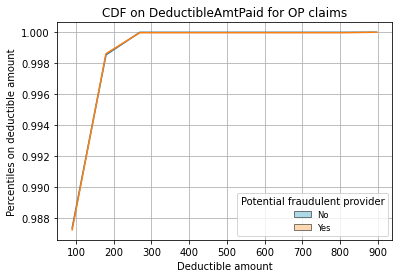

In [8]:
# CDF plot of Deductible amount on OP claims
warnings.filterwarnings("ignore") 
one = mpatches.Patch(facecolor='#add8e6', label='No', linewidth = 0.5, edgecolor = 'black')
two = mpatches.Patch(facecolor='#fed8b1', label='Yes', linewidth = 0.5, edgecolor = 'black')

OPdata_stat0 = OPdata.loc[OPdata["providerfraudlabel"] == 0];
OPdata_stat1 = OPdata.loc[OPdata["providerfraudlabel"] == 1];
counts, bin_edges = np.histogram(OPdata_stat0["DeductibleAmtPaid"],bins=10,density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
counts1, bin_edges1 = np.histogram(OPdata_stat1["DeductibleAmtPaid"],bins=10,density = True)
pdf1 = counts1/sum(counts1)
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:],cdf1)
plt.legend(handles=[one, two], title="Potential fraudulent provider",
                    loc=4, fontsize='small', fancybox=True)
plt.xlabel("Deductible amount")
plt.ylabel("Percentiles on deductible amount")
plt.title("CDF on DeductibleAmtPaid for OP claims")
plt.grid();
plt.show()

#### Observation - PDF on Deductible amount for In & Out patient claims

* Not much distribution, but still there is a long tail.
* 98% of OP claims have deductible amount less than 100 
* Only 2 % of OP claims have deductible amount more than 100. It can be outliers.
* Potential fraudulent provider status Yes & No -  perfectly overlapping. So, its not a useful feature for OP claims as well.

#### 3.3.1.3 How Deductible amounts are distributed and How good is this feature in predicting provider fraudulent status?

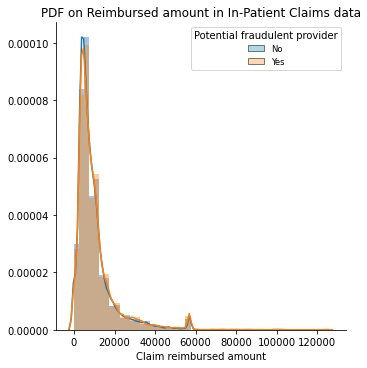

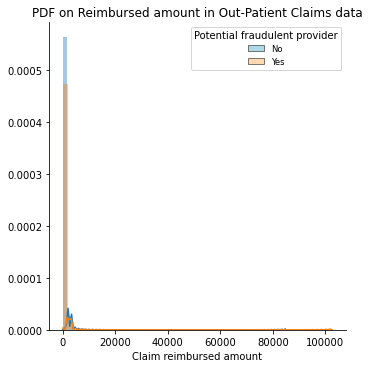

In [9]:
# PDF plot of claim reimburse amount on IP & OP claims
warnings.filterwarnings("ignore")
one = mpatches.Patch(facecolor='#add8e6',label='No', linewidth = 0.5, edgecolor = 'black')
two = mpatches.Patch(facecolor='#fed8b1',label = 'Yes', linewidth = 0.5, edgecolor = 'black')

sns.FacetGrid(IPdata,hue='providerfraudlabel',height=5).map(sns.distplot,"InscClaimAmtReimbursed");
plt.legend(handles=[one, two], title="Potential fraudulent provider",
                    loc=1, fontsize='small', fancybox=True)
plt.title("PDF on Reimbursed amount in In-Patient Claims data")
plt.xlabel("Claim reimbursed amount")
plt.show()

sns.FacetGrid(OPdata,hue='providerfraudlabel',height=5).map(sns.distplot,"InscClaimAmtReimbursed");
plt.legend(handles=[one, two], title="Potential fraudulent provider",
                    loc=1, fontsize='small', fancybox=True)
plt.title("PDF on Reimbursed amount in Out-Patient Claims data")
plt.xlabel("Claim reimbursed amount")
plt.show()

#### Observation - PDF on claim reimbursed amount for In & Out patient claims

* Potential fraudulent status - Yes & No - overlapping a lot on claim reimbursed amount
* There is a long tailness in both plot, and IP data got more spread than OP data

In [28]:
IPdata_stat0 = IPdata.loc[IPdata["providerfraudlabel"] == 0];
IPdata_stat1 = IPdata.loc[IPdata["providerfraudlabel"] == 1];
counts, bin_edges = np.histogram(IPdata_stat0["InscClaimAmtReimbursed"],bins=10,density = True)
print(bin_edges)
print(counts)
print(counts/sum(counts))
print(np.cumsum(counts/sum(counts)))

[     0.  12500.  25000.  37500.  50000.  62500.  75000.  87500. 100000.
 112500. 125000.]
[6.29475164e-05 1.16213683e-05 3.31771321e-06 9.93439550e-07
 9.79381443e-07 2.81162137e-08 5.15463918e-08 3.28022493e-08
 1.87441425e-08 9.37207123e-09]
[7.86843955e-01 1.45267104e-01 4.14714152e-02 1.24179944e-02
 1.22422680e-02 3.51452671e-04 6.44329897e-04 4.10028116e-04
 2.34301781e-04 1.17150890e-04]
[0.78684396 0.93211106 0.97358247 0.98600047 0.99824274 0.99859419
 0.99923852 0.99964855 0.99988285 1.        ]


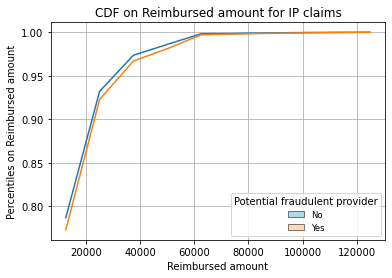

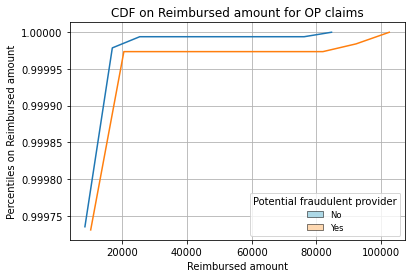

In [6]:
# CDF of Reimbursed amount on In & Out patient claims
warnings.filterwarnings("ignore") 
one = mpatches.Patch(facecolor='#add8e6', label='No', linewidth = 0.5, edgecolor = 'black')
two = mpatches.Patch(facecolor='#fed8b1', label='Yes', linewidth = 0.5, edgecolor = 'black')

IPdata_stat0 = IPdata.loc[IPdata["providerfraudlabel"] == 0];
IPdata_stat1 = IPdata.loc[IPdata["providerfraudlabel"] == 1];
counts, bin_edges = np.histogram(IPdata_stat0["InscClaimAmtReimbursed"],bins=10,density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
counts1, bin_edges1 = np.histogram(IPdata_stat1["InscClaimAmtReimbursed"],bins=10,density = True)
pdf1 = counts1/sum(counts1)
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:],cdf1)
plt.legend(handles=[one, two], title="Potential fraudulent provider",
                    loc=4, fontsize='small', fancybox=True)
plt.xlabel("Reimbursed amount")
plt.ylabel("Percentiles on Reimbursed amount")
plt.title("CDF on Reimbursed amount for IP claims")
plt.grid();
plt.show()


OPdata_stat0 = OPdata.loc[OPdata["providerfraudlabel"] == 0];
OPdata_stat1 = OPdata.loc[OPdata["providerfraudlabel"] == 1];
counts, bin_edges = np.histogram(OPdata_stat0["InscClaimAmtReimbursed"],bins=10,density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
counts1, bin_edges1 = np.histogram(OPdata_stat1["InscClaimAmtReimbursed"],bins=10,density = True)
pdf1 = counts1/sum(counts1)
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:],cdf1)
plt.legend(handles=[one, two], title="Potential fraudulent provider",
                    loc=4, fontsize='small', fancybox=True)
plt.xlabel("Reimbursed amount")
plt.ylabel("Percentiles on Reimbursed amount")
plt.title("CDF on Reimbursed amount for OP claims")
plt.grid();
plt.show()

In [14]:
### 99.9-100 percentile
for i in range(10,110,10):
    print(99.9+(i/1000),'percentile value is',np.percentile(OPdata["InscClaimAmtReimbursed"].values,99.9+(i/1000)))

99.91000000000001 percentile value is 4000.0
99.92 percentile value is 4100.0
99.93 percentile value is 4458.4800000011455
99.94000000000001 percentile value is 5100.0
99.95 percentile value is 5900.0
99.96000000000001 percentile value is 6800.0
99.97 percentile value is 8167.9200000013225
99.98 percentile value is 10400.0
99.99000000000001 percentile value is 14030.0
100.0 percentile value is 102500.0


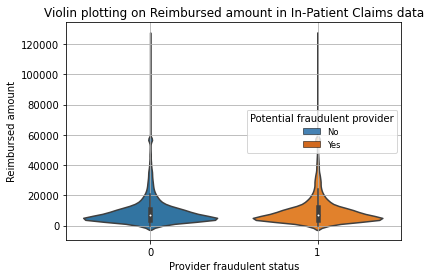

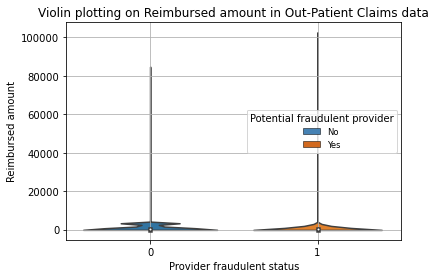

In [27]:
#Violin plot of Reimbursed amount on In & Out patient claims
one = mpatches.Patch(facecolor='#4682B4',label='No', linewidth = 0.5, edgecolor = 'black')
two = mpatches.Patch(facecolor='#D2691E',label = 'Yes', linewidth = 0.5, edgecolor = 'black')

sns.violinplot(x='providerfraudlabel',y='InscClaimAmtReimbursed', data=IPdata, size=10)
plt.grid()
plt.legend(handles=[one, two], title="Potential fraudulent provider",
                    loc=5, fontsize='small', fancybox=True)
plt.title("Violin plotting on Reimbursed amount in In-Patient Claims data")
plt.xlabel("Provider fraudulent status")
plt.ylabel("Reimbursed amount")
plt.show()

sns.violinplot(x='providerfraudlabel',y='InscClaimAmtReimbursed', data=OPdata, size=10)
plt.grid()
plt.legend(handles=[one, two], title="Potential fraudulent provider",
                    loc=5, fontsize='small', fancybox=True)
plt.title("Violin plotting on Reimbursed amount in Out-Patient Claims data")
plt.xlabel("Provider fraudulent status")
plt.ylabel("Reimbursed amount")
plt.show()

#### Observation -Violin & CDF on Reimbursed amount for In & Out patient claims

* There is a long tail for fraudulent providers.
* 0.01 % OP claims have Reimbursed amount more than 82000. Perhaps, it may be outliers.
* If Reimbursed amount crosses 82000 for OP claims, then it should be a fraudulent case.
* Though its overlapping a lot, still it can be a useful feature.

#### 3.3.1.4 How Annual Deductible & Reimbursed amounts are distributed and How good is this feature in predicting provider fraudulent status?

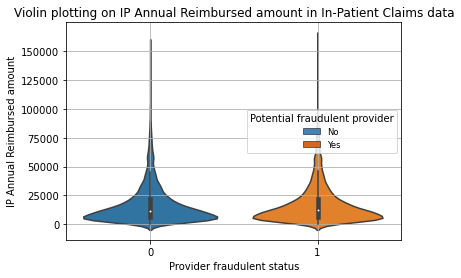

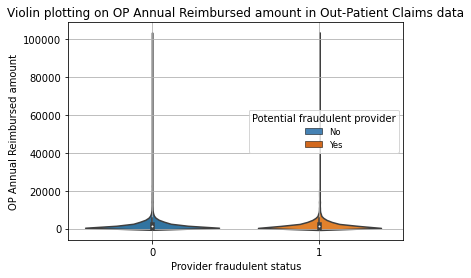

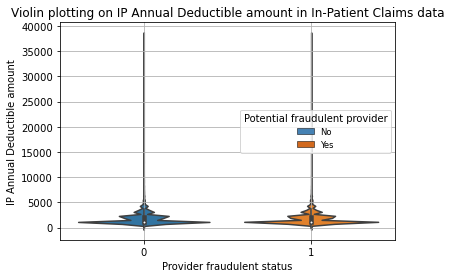

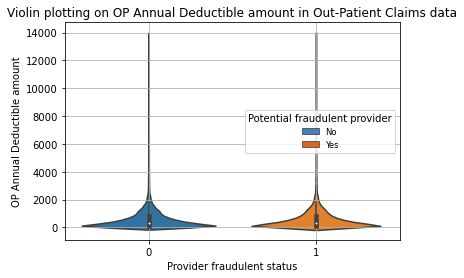

In [26]:
#Violin plot of Annual Reimbursed amount & Annual Deductible amount on In & Out claims
one = mpatches.Patch(facecolor='#4682B4',label='No', linewidth = 0.5, edgecolor = 'black')
two = mpatches.Patch(facecolor='#D2691E',label = 'Yes', linewidth = 0.5, edgecolor = 'black')

sns.violinplot(x='providerfraudlabel',y='IPAnnualReimbursementAmt', data=IPdata, size=10)
plt.grid()
plt.legend(handles=[one, two], title="Potential fraudulent provider",
                    loc=5, fontsize='small', fancybox=True)
plt.title("Violin plotting on IP Annual Reimbursed amount in In-Patient Claims data")
plt.xlabel("Provider fraudulent status")
plt.ylabel("IP Annual Reimbursed amount")
plt.show()

sns.violinplot(x='providerfraudlabel',y='OPAnnualReimbursementAmt', data=OPdata, size=10)
plt.grid()
plt.legend(handles=[one, two], title="Potential fraudulent provider",
                    loc=5, fontsize='small', fancybox=True)
plt.title("Violin plotting on OP Annual Reimbursed amount in Out-Patient Claims data")
plt.xlabel("Provider fraudulent status")
plt.ylabel("OP Annual Reimbursed amount")
plt.show()

sns.violinplot(x='providerfraudlabel',y='IPAnnualDeductibleAmt', data=IPdata, size=10)
plt.grid()
plt.legend(handles=[one, two], title="Potential fraudulent provider",
                    loc=5, fontsize='small', fancybox=True)
plt.title("Violin plotting on IP Annual Deductible amount in In-Patient Claims data")
plt.xlabel("Provider fraudulent status")
plt.ylabel("IP Annual Deductible amount")
plt.show()

sns.violinplot(x='providerfraudlabel',y='OPAnnualDeductibleAmt', data=OPdata, size=10)
plt.grid()
plt.legend(handles=[one, two], title="Potential fraudulent provider",
                    loc=5, fontsize='small', fancybox=True)
plt.title("Violin plotting on OP Annual Deductible amount in Out-Patient Claims data")
plt.xlabel("Provider fraudulent status")
plt.ylabel("OP Annual Deductible amount")
plt.show()

#### Observation - Annual Deductible & Reimbursed amounts distribution for IP & OP claims

* Annual Deductible & Reimbursed amounts distribution almost mirror image for both IP & OP claims
* Its perfectly overlapping, and there is a long tail in both of them.
* These are all not useful features to distinguish points between fraud and non-fraud data

#### 3.3.1.5 What are high frequency words in diagnosis describtion feature for fraudulent providers on IP & OP claims?

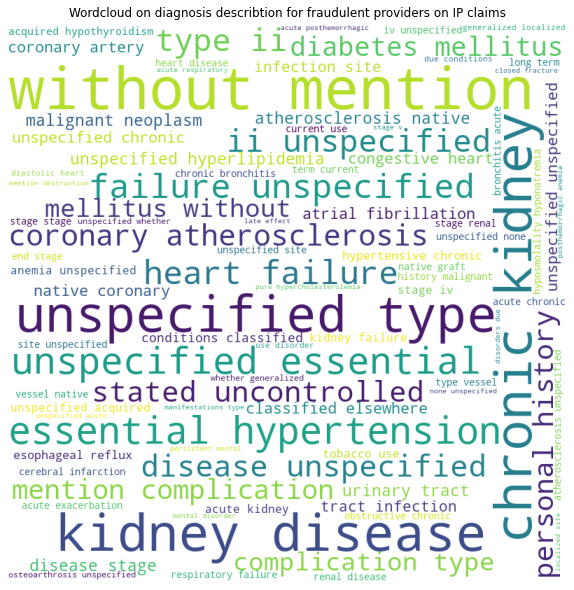

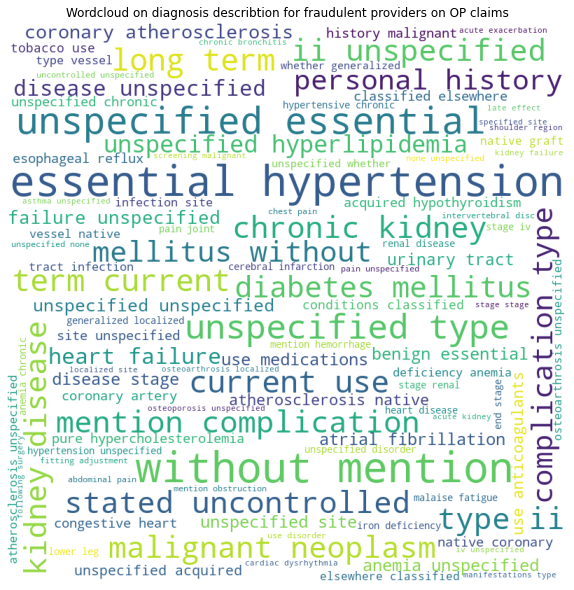

In [4]:
#high frequency words in diagnosis describtion feature for fraudulent providers on IP & OP claims?
from wordcloud import WordCloud, STOPWORDS 
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in IPdata.loc[IPdata['providerfraudlabel'] == 1]['IPDiagnsisDesc'].values:   
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    tokens = val.split()   
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()   
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title("Wordcloud on diagnosis describtion for fraudulent providers on IP claims")
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

for val in OPdata.loc[OPdata['providerfraudlabel'] == 1]['OPDiagnsisDesc'].values:   
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    tokens = val.split()   
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()   
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.title("Wordcloud on diagnosis describtion for fraudulent providers on OP claims")
plt.tight_layout(pad = 0) 
  
plt.show()

#### Observation on wordcloud for diagnisis describtion feature for fraudulent provider

* Upon above plots, some of the diagnosis codes getting used more frequently and its dominant for In -patient claims.
* Whereas, descent distribution of the diagnosis codes for Out-patient claims.

#### 3.3.1.6 Which Gender code involved in more provider fraudulent cases?

In [24]:
# Balancing class label equally prior to plot ..pls refer -https://stackoverflow.com/questions/45839316/pandas-balancing-data
g = IPdata.groupby('Gender')
IPtempdf = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))

f = OPdata.groupby('Gender')
OPtempdf = f.apply(lambda x: x.sample(f.size().min()).reset_index(drop=True))

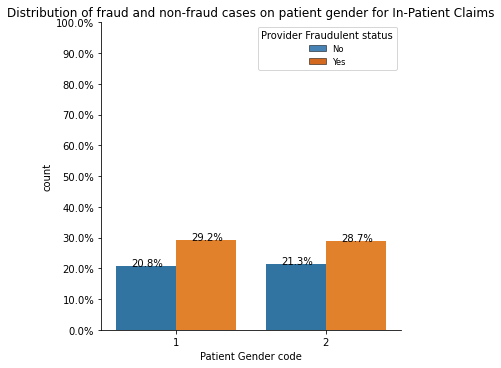

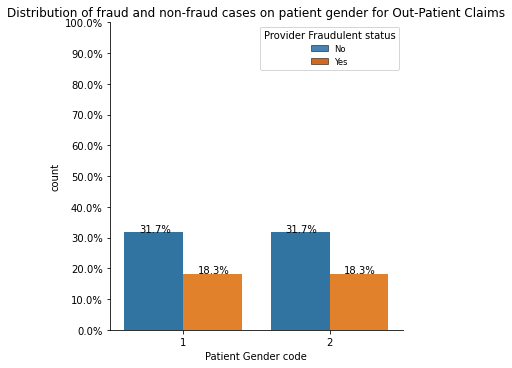

In [25]:
total = len(IPtempdf)*1
one = mpatches.Patch(facecolor='#4682B4',label='No', linewidth = 0.5, edgecolor = 'black')
two = mpatches.Patch(facecolor='#D2691E',label = 'Yes', linewidth = 0.5, edgecolor = 'black')
ax = sns.factorplot("Gender", data=IPtempdf, kind='count',hue='providerfraudlabel', legend =False)

for p in ax.ax.patches:
    ax.ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

plt.legend(handles=[one, two], title="Provider Fraudulent status", loc=1, fontsize='small', fancybox=True)

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.ax.yaxis.get_majorticklocs()/total))

plt.xlabel("Patient Gender code")
plt.title("Distribution of fraud and non-fraud cases on patient gender for In-Patient Claims")
plt.show()

total = len(OPtempdf)*1
ax = sns.factorplot("Gender", data=OPtempdf, kind='count',hue='providerfraudlabel', legend =False)

for p in ax.ax.patches:
    ax.ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

plt.legend(handles=[one, two], title="Provider Fraudulent status", loc=1, fontsize='small', fancybox=True)

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.ax.yaxis.get_majorticklocs()/total))

plt.xlabel("Patient Gender code")
plt.title("Distribution of fraud and non-fraud cases on patient gender for Out-Patient Claims")
plt.show()

#### Observation - Gender code on provider fraudulent cases

* No bias - Both Gender code # 1 & # 2 equally participated on fraud cases
* OP claims Provider fradulent rate is lesser than IP claims

#### 3.3.1.7 Which Race code involved in more provider fraudulent cases?

In [22]:
# Balancing class label equally prior to plot ..pls refer -https://stackoverflow.com/questions/45839316/pandas-balancing-data
g = IPdata.groupby('Race')
IPtempdf = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))

f = OPdata.groupby('Race')
OPtempdf = f.apply(lambda x: x.sample(f.size().min()).reset_index(drop=True))

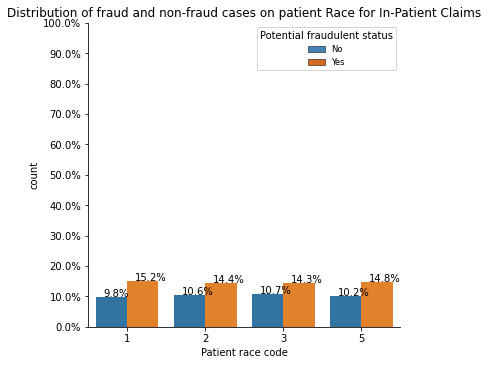

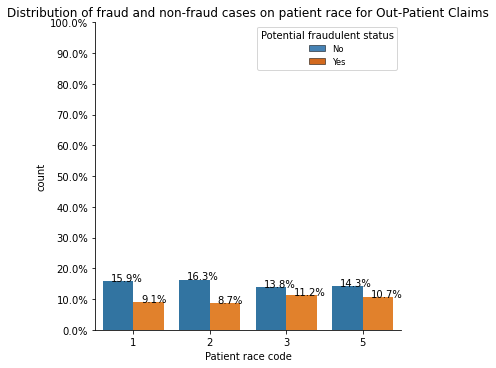

In [23]:
warnings.filterwarnings("ignore")
one = mpatches.Patch(facecolor='#4682B4',label='No', linewidth = 0.5, edgecolor = 'black')
two = mpatches.Patch(facecolor='#D2691E',label = 'Yes', linewidth = 0.5, edgecolor = 'black')

total = len(IPtempdf)*1
ax = sns.factorplot("Race", data=IPtempdf, kind='count',hue='providerfraudlabel', legend =False)

for p in ax.ax.patches:
    ax.ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

plt.legend(handles=[one, two], title="Potential fraudulent status", loc=1, fontsize='small', fancybox=True)

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.ax.yaxis.get_majorticklocs()/total))

plt.xlabel("Patient race code")
plt.title("Distribution of fraud and non-fraud cases on patient Race for In-Patient Claims")
plt.show()

total = len(OPtempdf)*1
ax = sns.factorplot("Race", data=OPtempdf, kind='count',hue='providerfraudlabel', legend =False)

for p in ax.ax.patches:
    ax.ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

plt.legend(handles=[one, two], title="Potential fraudulent status", loc=1, fontsize='small', fancybox=True)

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.ax.yaxis.get_majorticklocs()/total))

plt.xlabel("Patient race code")
plt.title("Distribution of fraud and non-fraud cases on patient race for Out-Patient Claims")
plt.show()

#### Observation - Race code on fraudulent cases

* Race code #5 having slightly more no of fraudulent cases than other codes on In -Patient claims 
* Race code #3 having slightly more no of fraudulent cases than other codes on Out -Patient claims 

#### 3.3.1.8 How patient age distributed and how good is this feature in predicting fraudulent provider?

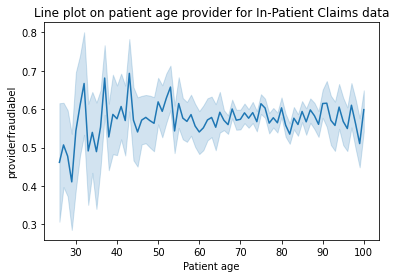

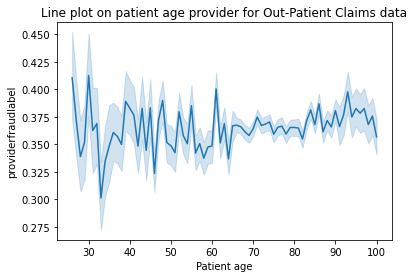

In [91]:
sns.lineplot(data=IPdata, x="IPPatientage", y="providerfraudlabel")
plt.title("Line plot on patient age provider for In-Patient Claims data")
plt.xlabel("Patient age")
plt.show()
sns.lineplot(data=OPdata, x="OPPatientage", y="providerfraudlabel")
plt.title("Line plot on patient age provider for Out-Patient Claims data")
plt.xlabel("Patient age")
plt.show()


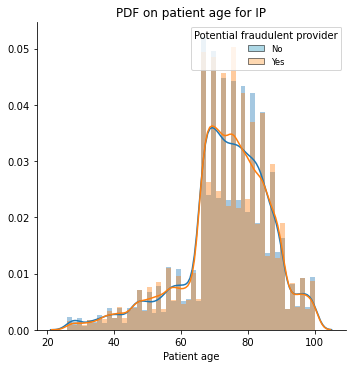

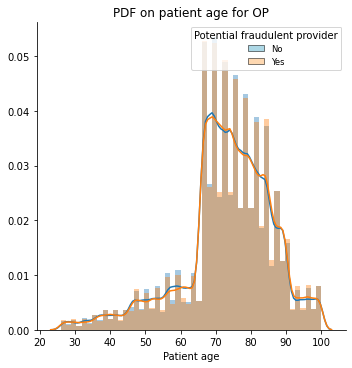

In [92]:
# PDF plot on patient age for IP & OP claims
warnings.filterwarnings("ignore")
one = mpatches.Patch(facecolor='#add8e6',label='No', linewidth = 0.5, edgecolor = 'black')
two = mpatches.Patch(facecolor='#fed8b1',label = 'Yes', linewidth = 0.5, edgecolor = 'black')

sns.FacetGrid(IPdata,hue='providerfraudlabel',height=5).map(sns.distplot,"IPPatientage");
plt.legend(handles=[one, two], title="Potential fraudulent provider",
                    loc=1, fontsize='small', fancybox=True)
plt.title("PDF on patient age for IP")
plt.xlabel("Patient age")
plt.show()

sns.FacetGrid(OPdata,hue='providerfraudlabel',height=5).map(sns.distplot,"OPPatientage");
plt.legend(handles=[one, two], title="Potential fraudulent provider",
                    loc=1, fontsize='small', fancybox=True)
plt.title("PDF on patient age for OP")
plt.xlabel("Patient age")
plt.show()

#### Observation - Patient age on fraudulent cases

* Potential fraudulent status 0 & 1 overlapping a lot for across the plot
* Not much useful

#### 3.3.1.9 What is the impact of RenalDiseaseIndicator in predictig provider fraudulent status?

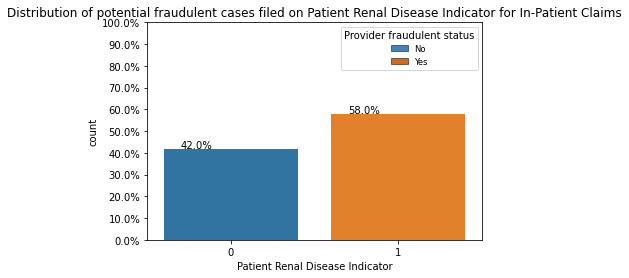

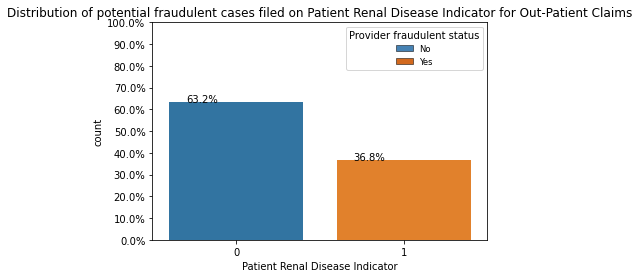

In [95]:
warnings.filterwarnings("ignore")
one = mpatches.Patch(facecolor='#4682B4',label='No', linewidth = 0.5, edgecolor = 'black')
two = mpatches.Patch(facecolor='#D2691E',label = 'Yes', linewidth = 0.5, edgecolor = 'black')

total = len(IPdata.loc[IPdata['RenalDiseaseIndicator'] == 1 ])*1
ax=sns.countplot(x="providerfraudlabel", data=IPdata.loc[IPdata['RenalDiseaseIndicator'] == 1 ])
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

plt.legend(handles=[one, two], title="Provider fraudulent status",
                    loc=1, fontsize='small', fancybox=True)
#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.xlabel("Patient Renal Disease Indicator")
plt.title("Distribution of potential fraudulent cases filed on Patient Renal Disease Indicator for In-Patient Claims")
plt.show()

total = len(OPdata.loc[OPdata['RenalDiseaseIndicator'] == 1])*1
ax=sns.countplot(x="providerfraudlabel", data=OPdata.loc[OPdata['RenalDiseaseIndicator'] == 1 ])
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

plt.legend(handles=[one, two], title="Provider fraudulent status",
                    loc=1, fontsize='small', fancybox=True)
#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.xlabel("Patient Renal Disease Indicator")
plt.title("Distribution of potential fraudulent cases filed on Patient Renal Disease Indicator for Out-Patient Claims")
plt.show()

#### Observation - Renal Disease Indicator on fraudulent cases

* If Renal Diseases indicator - Y & Inpatient claims, then slighly higher propability on fraudulent cases
* If Renal Diseases indicator - N & Outpatient claims, then higher propability on non - fraudulent cases

#### 3.3.1.10 What is the impact of Patient DOD in predicting provider fraudulent status?

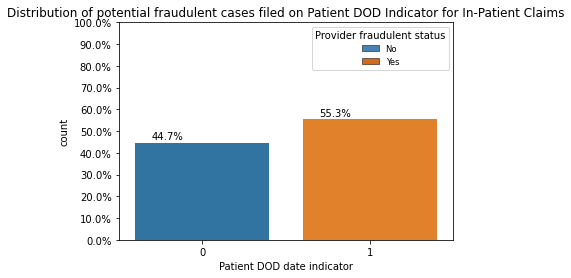

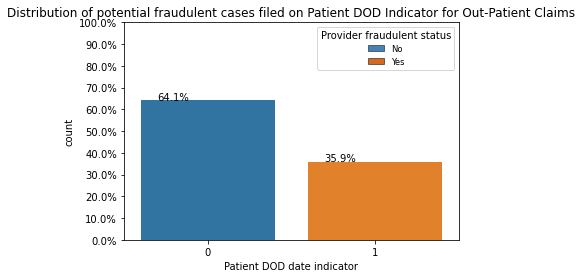

In [96]:
warnings.filterwarnings("ignore")
one = mpatches.Patch(facecolor='#4682B4',label='No', linewidth = 0.5, edgecolor = 'black')
two = mpatches.Patch(facecolor='#D2691E',label = 'Yes', linewidth = 0.5, edgecolor = 'black')

total = len(IPdata.loc[IPdata['IPDODind'] == 1 ])*1
ax=sns.countplot(x="providerfraudlabel", data=IPdata.loc[IPdata['IPDODind'] == 1 ])
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

plt.legend(handles=[one, two], title="Provider fraudulent status",
                    loc=1, fontsize='small', fancybox=True)
#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.xlabel("Patient DOD date indicator")
plt.title("Distribution of potential fraudulent cases filed on Patient DOD Indicator for In-Patient Claims")
plt.show()

total = len(OPdata.loc[OPdata['OPDODind'] == 1])*1
ax=sns.countplot(x="providerfraudlabel", data=OPdata.loc[OPdata['OPDODind'] == 1 ])
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

plt.legend(handles=[one, two], title="Provider fraudulent status",
                    loc=1, fontsize='small', fancybox=True)
#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.xlabel("Patient DOD date indicator")
plt.title("Distribution of potential fraudulent cases filed on Patient DOD Indicator for Out-Patient Claims")
plt.show()

#### Observation - DOD Indicator on fraudulent cases

* If DOD indicator - Y & Inpatient claims, then slighly higher propability on fraudulent cases
* If DOD indicator - N & Outpatient claims, then higher propability on non - fraudulent cases

#### 3.3.1.11 How treatmentdays, treatmentmonth & last treatment day are distributed ?

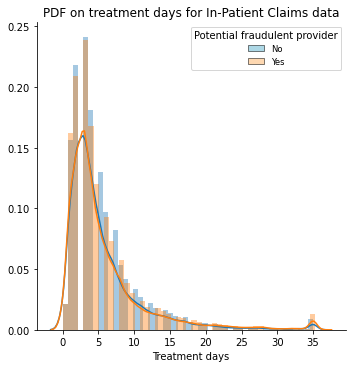

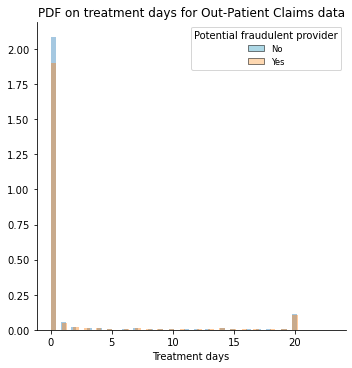

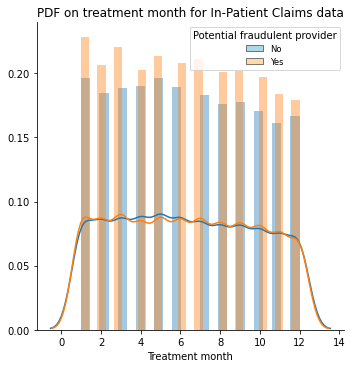

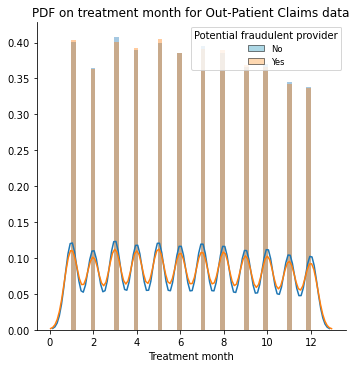

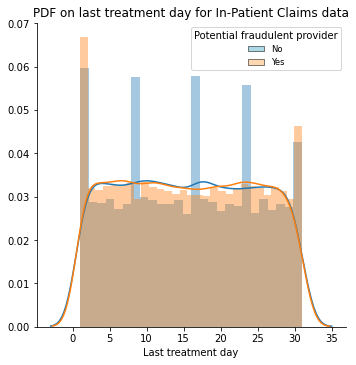

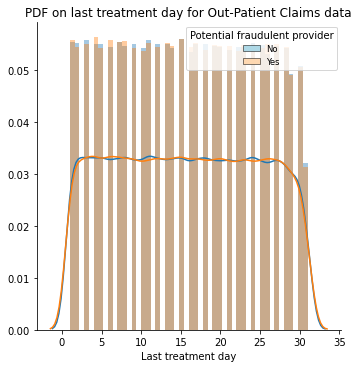

In [98]:
# PDF plot of treatmentdays, treatmentmonth & last treatment day on IP & OP claims
warnings.filterwarnings("ignore")
one = mpatches.Patch(facecolor='#add8e6',label='No', linewidth = 0.5, edgecolor = 'black')
two = mpatches.Patch(facecolor='#fed8b1',label = 'Yes', linewidth = 0.5, edgecolor = 'black')

sns.FacetGrid(IPdata,hue='providerfraudlabel',height=5).map(sns.distplot,"IPtreatmentdays");
plt.legend(handles=[one, two], title="Potential fraudulent provider",
                    loc=1, fontsize='small', fancybox=True)
plt.title("PDF on treatment days for In-Patient Claims data")
plt.xlabel("Treatment days")
plt.show()

sns.FacetGrid(OPdata,hue='providerfraudlabel',height=5).map(sns.distplot,"OPtreatmentdays");
plt.legend(handles=[one, two], title="Potential fraudulent provider",
                    loc=1, fontsize='small', fancybox=True)
plt.title("PDF on treatment days for Out-Patient Claims data")
plt.xlabel("Treatment days")
plt.show()

sns.FacetGrid(IPdata,hue='providerfraudlabel',height=5).map(sns.distplot,"IPtreatmentmonth");
plt.legend(handles=[one, two], title="Potential fraudulent provider",
                    loc=1, fontsize='small', fancybox=True)
plt.title("PDF on treatment month for In-Patient Claims data")
plt.xlabel("Treatment month")
plt.show()

sns.FacetGrid(OPdata,hue='providerfraudlabel',height=5).map(sns.distplot,"OPtreatmentmonth");
plt.legend(handles=[one, two], title="Potential fraudulent provider",
                    loc=1, fontsize='small', fancybox=True)
plt.title("PDF on treatment month for Out-Patient Claims data")
plt.xlabel("Treatment month")
plt.show()

sns.FacetGrid(IPdata,hue='providerfraudlabel',height=5).map(sns.distplot,"IPtreatmentdate");
plt.legend(handles=[one, two], title="Potential fraudulent provider",
                    loc=1, fontsize='small', fancybox=True)
plt.title("PDF on last treatment day for In-Patient Claims data")
plt.xlabel("Last treatment day")
plt.show()

sns.FacetGrid(OPdata,hue='providerfraudlabel',height=5).map(sns.distplot,"OPtreatmentdate");
plt.legend(handles=[one, two], title="Potential fraudulent provider",
                    loc=1, fontsize='small', fancybox=True)
plt.title("PDF on last treatment day for Out-Patient Claims data")
plt.xlabel("Last treatment day")
plt.show()

#### Observation - treatmentdays, treatmentmonth & last treatment day on fraudulent status

* Fraudulent & Non-fraudulent status overlapping a lot
* Not much useful

#### 3.3.1.12 How No of Diagnosis, No of Proc & Summation of chronic cond values are distributed ?

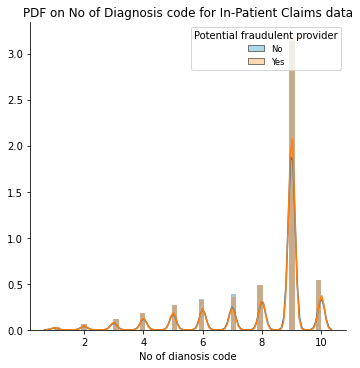

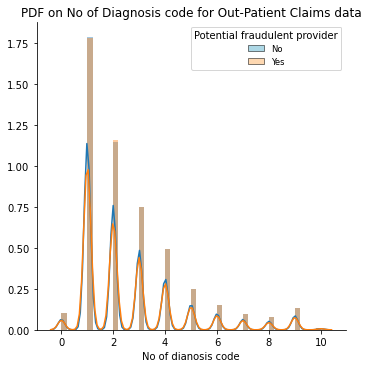

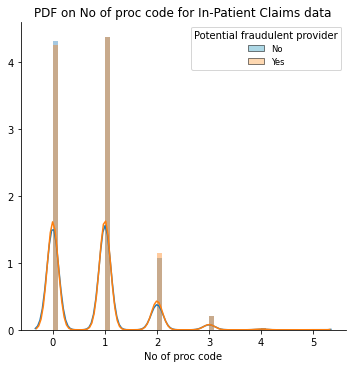

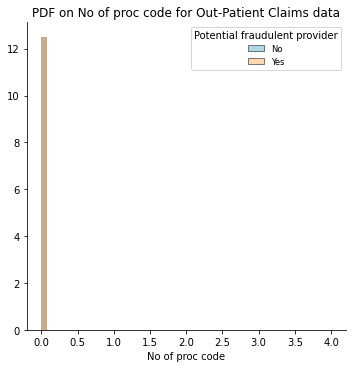

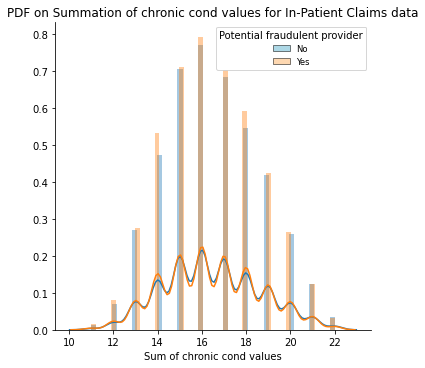

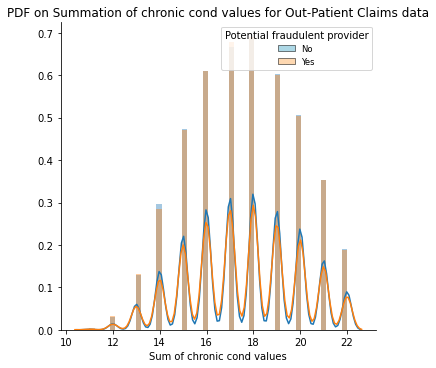

In [99]:
# PDF on No of Diagnosis, No of Proc & Summation of chronic cond values for IP & OP claims
sns.FacetGrid(IPdata,hue='providerfraudlabel',height=5).map(sns.distplot,"IPNoofDigcode");
plt.legend(handles=[one, two], title="Potential fraudulent provider",
                    loc=1, fontsize='small', fancybox=True)
plt.title("PDF on No of Diagnosis code for In-Patient Claims data")
plt.xlabel("No of dianosis code")
plt.show()

sns.FacetGrid(OPdata,hue='providerfraudlabel',height=5).map(sns.distplot,"OPNoofDigcode");
plt.legend(handles=[one, two], title="Potential fraudulent provider",
                    loc=1, fontsize='small', fancybox=True)
plt.title("PDF on No of Diagnosis code for Out-Patient Claims data")
plt.xlabel("No of dianosis code")
plt.show()

sns.FacetGrid(IPdata,hue='providerfraudlabel',height=5).map(sns.distplot,"IPNoofProccode");
plt.legend(handles=[one, two], title="Potential fraudulent provider",
                    loc=1, fontsize='small', fancybox=True)
plt.title("PDF on No of proc code for In-Patient Claims data")
plt.xlabel("No of proc code")
plt.show()

sns.FacetGrid(OPdata,hue='providerfraudlabel',height=5).map(sns.distplot,"OPNoofProccode");
plt.legend(handles=[one, two], title="Potential fraudulent provider",
                    loc=1, fontsize='small', fancybox=True)
plt.title("PDF on No of proc code for Out-Patient Claims data")
plt.xlabel("No of proc code")
plt.show()

sns.FacetGrid(IPdata,hue='providerfraudlabel',height=5).map(sns.distplot,"IPsumchronic");
plt.legend(handles=[one, two], title="Potential fraudulent provider",
                    loc=1, fontsize='small', fancybox=True)
plt.title("PDF on Summation of chronic cond values for In-Patient Claims data")
plt.xlabel("Sum of chronic cond values")
plt.show()

sns.FacetGrid(OPdata,hue='providerfraudlabel',height=5).map(sns.distplot,"OPsumchronic");
plt.legend(handles=[one, two], title="Potential fraudulent provider",
                    loc=1, fontsize='small', fancybox=True)
plt.title("PDF on Summation of chronic cond values for Out-Patient Claims data")
plt.xlabel("Sum of chronic cond values")
plt.show()

#### Observation - No of Diagnosis, No of Proc & Summation of chronic cond values on fraudulent status

* Fraudulent & Non-fraudulent status overlapping a lot
* Not much useful

In [153]:
IPdata[(IPdata.AttendingPhysician == 0) & (IPdata.OperatingPhysician != 0) & (IPdata.OtherPhysician !=0)]

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
38288  BENE151365  CLM36160   2009-01-30  2009-02-09  PRV56610   

       InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
38288                    9000                  0          PHY394185   

      OtherPhysician AdmissionDt  ... IPDODind  IPPatientage IPtreatmentdays  \
38288      PHY378195  2009-01-30  ...        0            53              10   

      IPtreatmentmonth IPtreatmentdate IPNoofDigcode IPNoofProccode  \
38288                2               9             9              1   

      IPsumchronic IPStateabb potentialfraud  
38288           14         SC             No  

[1 rows x 64 columns]

#### 3.3.1.13 How many fraudulent cases filed when there is an operating physician?

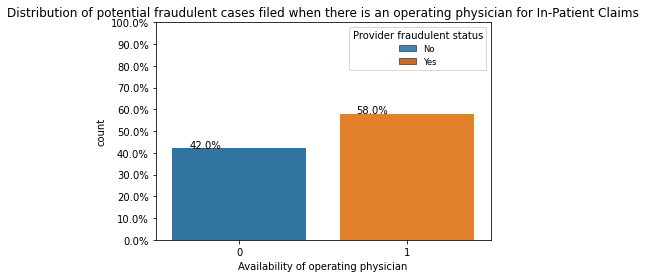

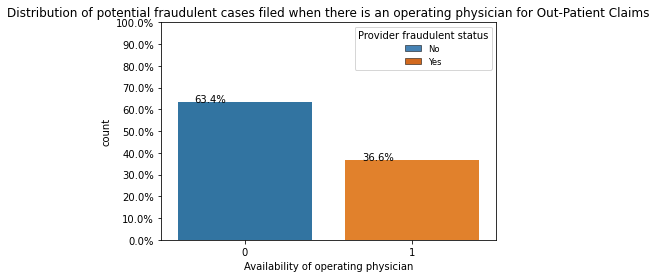

In [20]:
warnings.filterwarnings("ignore")
one = mpatches.Patch(facecolor='#4682B4',label='No', linewidth = 0.5, edgecolor = 'black')
two = mpatches.Patch(facecolor='#D2691E',label = 'Yes', linewidth = 0.5, edgecolor = 'black')

total = len(IPdata[(IPdata.OperatingPhysician != 0)])*1
ax=sns.countplot(x="providerfraudlabel", data=IPdata[(IPdata.OperatingPhysician != 0)])
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

plt.legend(handles=[one, two], title="Provider fraudulent status",
                    loc=1, fontsize='small', fancybox=True)
#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.xlabel("Availability of operating physician")
plt.title("Distribution of potential fraudulent cases filed when there is an operating physician for In-Patient Claims")
plt.show()

total = len(OPdata[(OPdata.OperatingPhysician != 0)])*1
ax=sns.countplot(x="providerfraudlabel", data=OPdata[(OPdata.OperatingPhysician != 0)])
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

plt.legend(handles=[one, two], title="Provider fraudulent status",
                    loc=1, fontsize='small', fancybox=True)
#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.xlabel("Availability of operating physician")
plt.title("Distribution of potential fraudulent cases filed when there is an operating physician for Out-Patient Claims")
plt.show()



#### Observation - operating physician for In & Out patient claims

* More no of fraudulent cases filed when there is an operating physician for In patient claims
* More no of non-fraudulent cases filed when there is an operating physician for Out patient claims

#### 3.3.1.14 How many fraudulent cases filed when there is an OtherPhysician?

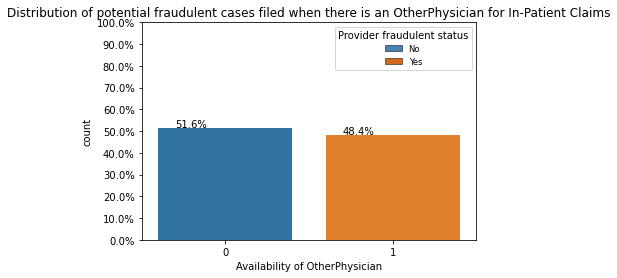

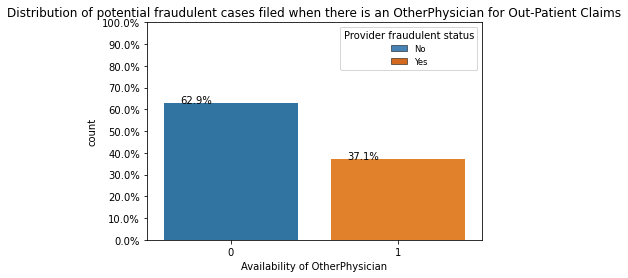

In [21]:
warnings.filterwarnings("ignore")
one = mpatches.Patch(facecolor='#4682B4',label='No', linewidth = 0.5, edgecolor = 'black')
two = mpatches.Patch(facecolor='#D2691E',label = 'Yes', linewidth = 0.5, edgecolor = 'black')

total = len(IPdata[(IPdata.OtherPhysician != 0)])*1
ax=sns.countplot(x="providerfraudlabel", data=IPdata[(IPdata.OtherPhysician != 0)])
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

plt.legend(handles=[one, two], title="Provider fraudulent status",
                    loc=1, fontsize='small', fancybox=True)
#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.xlabel("Availability of OtherPhysician")
plt.title("Distribution of potential fraudulent cases filed when there is an OtherPhysician for In-Patient Claims")
plt.show()

total = len(OPdata[(OPdata.OtherPhysician != 0)])*1
ax=sns.countplot(x="providerfraudlabel", data=OPdata[(OPdata.OtherPhysician != 0)])
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

plt.legend(handles=[one, two], title="Provider fraudulent status",
                    loc=1, fontsize='small', fancybox=True)
#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.xlabel("Availability of OtherPhysician")
plt.title("Distribution of potential fraudulent cases filed when there is an OtherPhysician for Out-Patient Claims")
plt.show()

#### Observation - OtherPhysician for In & Out patient claims

* Same no of fraudulent & non-fraudulent cases filed when there is an OtherPhysician for In Patient claims
* More no of non-fraudulent cases filed when there is an OtherPhysician for Out Patient claims

#### 3.3.1.15 States that filed highest and lowest fraudulent cases? 

In [3]:
# Pandas dataframe grouby count, mean: https://stackoverflow.com/a/19385591/4084039

temp = pd.DataFrame(IPdata.groupby(['IPStateabb'])['providerfraudlabel'].apply(np.mean)*100).reset_index()
temp.columns = ['state_code', 'percantage_fraudulent_cases']

# How to plot US state heatmap: https://datascience.stackexchange.com/a/9620

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = temp['state_code'],
        z = temp['percantage_fraudulent_cases'].astype(float),
        locationmode = 'USA-states',
        text = temp['state_code'],
        marker = dict(line = dict (color = 'rgb(255,255,255)',width = 2)),
        colorbar = dict(title = "% of pro")
    ) ]

layout = dict(
        title = '% percentage of fraudulent cases filed by US states for IP claims',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='us-map-heat-map')

In [4]:
# Pandas dataframe grouby count, mean: https://stackoverflow.com/a/19385591/4084039

temp = pd.DataFrame(OPdata.groupby(['OPStateabb'])['providerfraudlabel'].apply(np.mean)*100).reset_index()
temp.columns = ['state_code', 'percantage_fraudulent_cases']

# How to plot US state heatmap: https://datascience.stackexchange.com/a/9620

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = temp['state_code'],
        z = temp['percantage_fraudulent_cases'].astype(float),
        locationmode = 'USA-states',
        text = temp['state_code'],
        marker = dict(line = dict (color = 'rgb(255,255,255)',width = 2)),
        colorbar = dict(title = "% of pro")
    ) ]

layout = dict(
        title = '% percentage of fraudulent cases filed by US states for OP claims',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='us-map-heat-map')

#### Observation - US state wise fraudulent cases for IP and OP claims

* 79 % fraudulent cases filed by California for IP claims, which is the top of the list.
* 65 % fraudulent cases filed by South Dakota for OP claims, which is the top of the list.
* 16 % fraudulent cases filed by Florida for IP claims,  which is the least number.
* Only 7 % fraudulent cases filed by Virginia for OP claims, which is the least number.
* State code is a very useful feature to predict fraudulent status.

### 3.3.2 Multi- Variate Analysis

#### 3.3.2.1 TSNE - Visualization - Converting numerical features into 2D

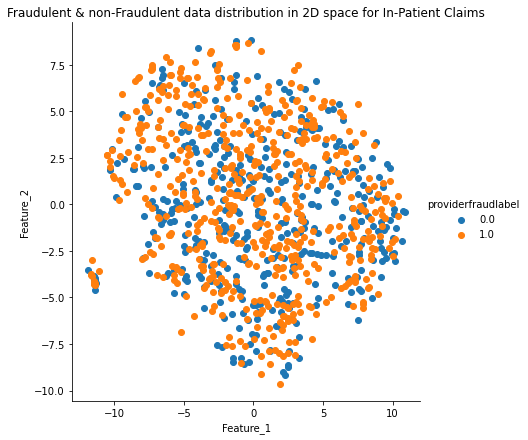

In [71]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Fetching only numerical features from dataset
fields = ['DeductibleAmtPaid', 'IPAnnualReimbursementAmt','IPAnnualDeductibleAmt','IPtreatmentdays','IPtreatmentmonth','IPtreatmentdate',
                  'IPNoofDigcode','IPNoofProccode','IPsumchronic']

std_data = StandardScaler().fit_transform(IPdata[fields]) #standardizing the data 

tsne_model = TSNE(perplexity = 150, n_iter =8000) #building TSNE model
fit_data = tsne_model.fit_transform(std_data[0:1000,:])

fit_data = np.vstack((fit_data.T, IPdata['providerfraudlabel'][0:1000])).T
fit_df = pd.DataFrame(data=fit_data, columns=("Feature_1", "Feature_2", "providerfraudlabel"))

sns.FacetGrid(fit_df, hue="providerfraudlabel", size=6).map(plt.scatter, 'Feature_1', 'Feature_2').add_legend()
plt.title("Fraudulent & non-Fraudulent data distribution in 2D space for In-Patient Claims")
plt.show()

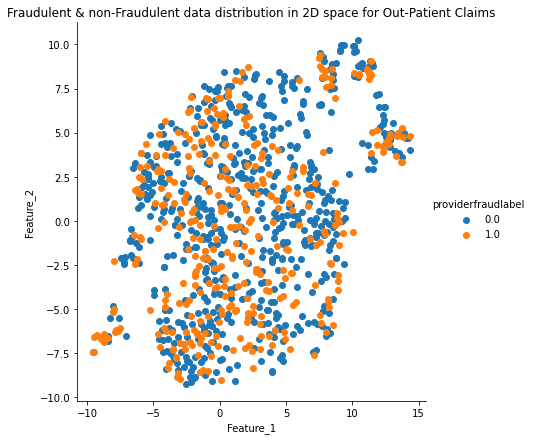

In [72]:
# Fetching only numerical features from dataset
fields = ['DeductibleAmtPaid', 'OPAnnualReimbursementAmt','OPAnnualDeductibleAmt','OPtreatmentdays','OPtreatmentmonth','OPtreatmentdate',
                  'OPNoofDigcode','OPNoofProccode','OPsumchronic']

std_data = StandardScaler().fit_transform(OPdata[fields]) #standardizing the data 

tsne_model = TSNE(perplexity = 150, n_iter =8000) #building TSNE model
fit_data = tsne_model.fit_transform(std_data[0:1000,:])

fit_data = np.vstack((fit_data.T, OPdata['providerfraudlabel'][0:1000])).T
fit_df = pd.DataFrame(data=fit_data, columns=("Feature_1", "Feature_2", "providerfraudlabel"))

sns.FacetGrid(fit_df, hue="providerfraudlabel", size=6).map(plt.scatter, 'Feature_1', 'Feature_2').add_legend()
plt.title("Fraudulent & non-Fraudulent data distribution in 2D space for Out-Patient Claims")
plt.show()

#### Observation - TSNE

* Fraudulent & non-fraudulent classes overlapping a lot.

#### 3.3.2.2 How do the Patient Age & Gender impact fraudulent provider?

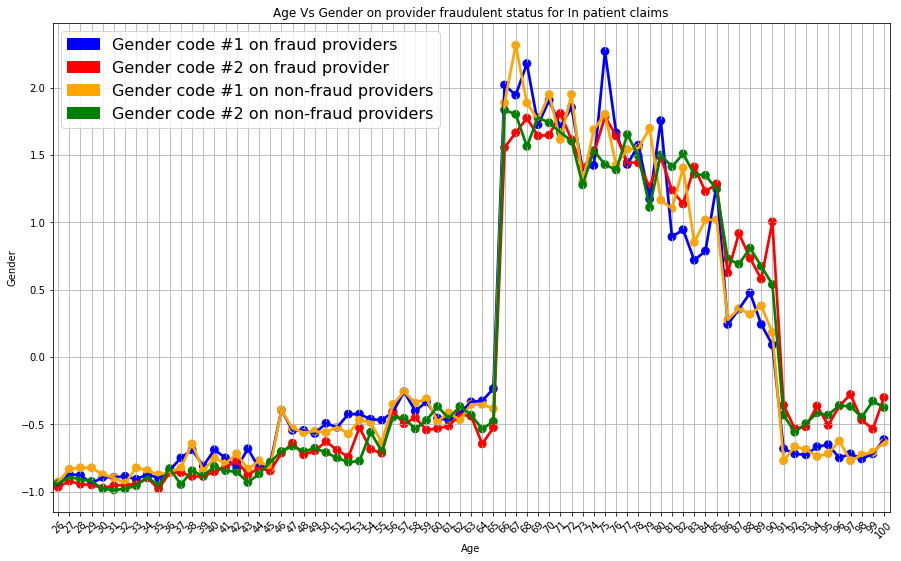

In [70]:
# Filtering the records which have fraudulent providers and Gender 1 and then groupby on PatientAge
temp1 = IPdata.loc[(IPdata.providerfraudlabel == 1) & (IPdata.Gender ==1)].groupby(['IPPatientage']).count()
temp1 = temp1.reset_index()

# Filtering the records which have fraudulent providers and Gender 2 and then groupby on PatientAge
temp2 = IPdata.loc[(IPdata.providerfraudlabel == 1) & (IPdata.Gender ==2)].groupby(['IPPatientage']).count()
temp2 = temp2.reset_index()

temp3 = IPdata.loc[(IPdata.providerfraudlabel == 0) & (IPdata.Gender ==1)].groupby(['IPPatientage']).count()
temp3 = temp3.reset_index()

# Filtering the records which have fraudulent providers and Gender 2 and then groupby on PatientAge
temp4 = IPdata.loc[(IPdata.providerfraudlabel == 0) & (IPdata.Gender ==2)].groupby(['IPPatientage']).count()
temp4 = temp4.reset_index()

#Normalize the data, i.e. zero mean and unit std. I did this to be able to compare the shapes of both graphs, since 
#they have different ranges
normalised_df = pd.DataFrame()

normalised_df['Gender_1'] = temp1['Gender']
normalised_df['Gender_2'] = temp2['Gender']
normalised_df['Gender_1_NP'] = temp3['Gender']
normalised_df['Gender_2_NP'] = temp4['Gender']
normalised_df = (normalised_df - normalised_df.mean()) / normalised_df.std()#(normalised_df.max() - normalised_df.min()) 
normalised_df['age'] = temp1['IPPatientage']


#Plot
plt.figure(figsize=(15, 9))
ax = sns.pointplot(x = normalised_df.age, y = normalised_df.Gender_1, color = 'blue')
ax = sns.pointplot(x = normalised_df.age, y = normalised_df.Gender_2, color = 'red')
ax = sns.pointplot(x = normalised_df.age, y = normalised_df.Gender_1_NP, color = 'orange')
ax = sns.pointplot(x = normalised_df.age, y = normalised_df.Gender_2_NP, color = 'green')

blue_patch = mpatches.Patch(color='blue', label='Gender code #1 on fraud providers')
red_patch = mpatches.Patch(color='red', label='Gender code #2 on fraud provider')
orange_patch = mpatches.Patch(color='orange', label='Gender code #1 on non-fraud providers')
green_patch = mpatches.Patch(color='green', label='Gender code #2 on non-fraud providers')
plt.legend(handles=[blue_patch, red_patch, orange_patch, green_patch], loc='upper left', fontsize = 16)
plt.grid()
plt.xlabel("Age")
plt.ylabel("Gender")
plt.title("Age Vs Gender on provider fraudulent status for In patient claims")

plt.xticks(rotation=45);

#### Observation Age Vs Gender on provider fraudulent 

* There is a big leap at 65. It shows there are most no of fraudulent cases filed when patient age >= 65
* 65 to 90 - more no of fraudulent cases filed.
* Gender #1 tend to involve more fraudulent cases than Gender #2
* The highest fraudulent cases filed at age 75

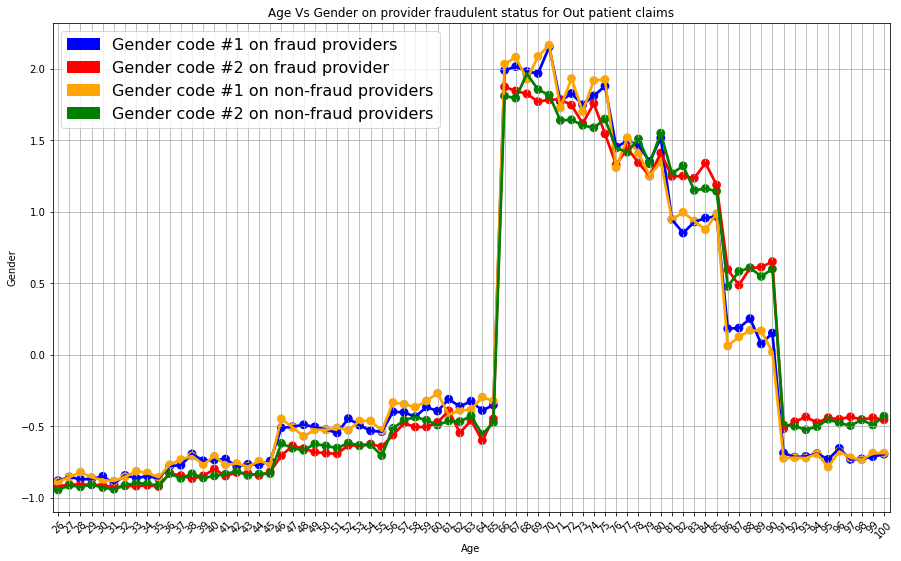

In [71]:
# Filtering the records which have fraudulent providers and Gender 1 and then groupby on PatientAge
temp1 = OPdata.loc[(OPdata.providerfraudlabel == 1) & (OPdata.Gender ==1)].groupby(['OPPatientage']).count()
temp1 = temp1.reset_index()

# Filtering the records which have fraudulent providers and Gender 2 and then groupby on PatientAge
temp2 = OPdata.loc[(OPdata.providerfraudlabel == 1) & (OPdata.Gender ==2)].groupby(['OPPatientage']).count()
temp2 = temp2.reset_index()

temp3 = OPdata.loc[(OPdata.providerfraudlabel == 0) & (OPdata.Gender ==1)].groupby(['OPPatientage']).count()
temp3 = temp3.reset_index()

# Filtering the records which have fraudulent providers and Gender 2 and then groupby on PatientAge
temp4 = OPdata.loc[(OPdata.providerfraudlabel == 0) & (OPdata.Gender ==2)].groupby(['OPPatientage']).count()
temp4 = temp4.reset_index()

#Normalize the data, i.e. zero mean and unit std. I did this to be able to compare the shapes of both graphs, since 
#they have different ranges
normalised_df = pd.DataFrame()

normalised_df['Gender_1'] = temp1['Gender']
normalised_df['Gender_2'] = temp2['Gender']
normalised_df['Gender_1_NP'] = temp3['Gender']
normalised_df['Gender_2_NP'] = temp4['Gender']
normalised_df = (normalised_df - normalised_df.mean()) / normalised_df.std()#(normalised_df.max() - normalised_df.min()) 
normalised_df['age'] = temp1['OPPatientage']


#Plot
plt.figure(figsize=(15, 9))
ax = sns.pointplot(x = normalised_df.age, y = normalised_df.Gender_1, color = 'blue')
ax = sns.pointplot(x = normalised_df.age, y = normalised_df.Gender_2, color = 'red')
ax = sns.pointplot(x = normalised_df.age, y = normalised_df.Gender_1_NP, color = 'orange')
ax = sns.pointplot(x = normalised_df.age, y = normalised_df.Gender_2_NP, color = 'green')

blue_patch = mpatches.Patch(color='blue', label='Gender code #1 on fraud providers')
red_patch = mpatches.Patch(color='red', label='Gender code #2 on fraud provider')
orange_patch = mpatches.Patch(color='orange', label='Gender code #1 on non-fraud providers')
green_patch = mpatches.Patch(color='green', label='Gender code #2 on non-fraud providers')
plt.legend(handles=[blue_patch, red_patch, orange_patch, green_patch], loc='upper left', fontsize = 16)
plt.grid()
plt.xlabel("Age")
plt.ylabel("Gender")
plt.title("Age Vs Gender on provider fraudulent status for Out patient claims")

plt.xticks(rotation=45);

#### Observation Age Vs Gender on provider fraudulent 

* There is a big leap at 65. It shows there are most no of fraudulent cases filed when patient age >= 65
* 65 to 90 - more no of fraudulent cases filed.
* Gender #1 tend to involve more fraudulent cases than Gender #2
* The highest fraudulent cases filed at age 70

#### 3.3.2.3 How do the Patient Age & noofphysiciansconsulted impact fraudulent provider?

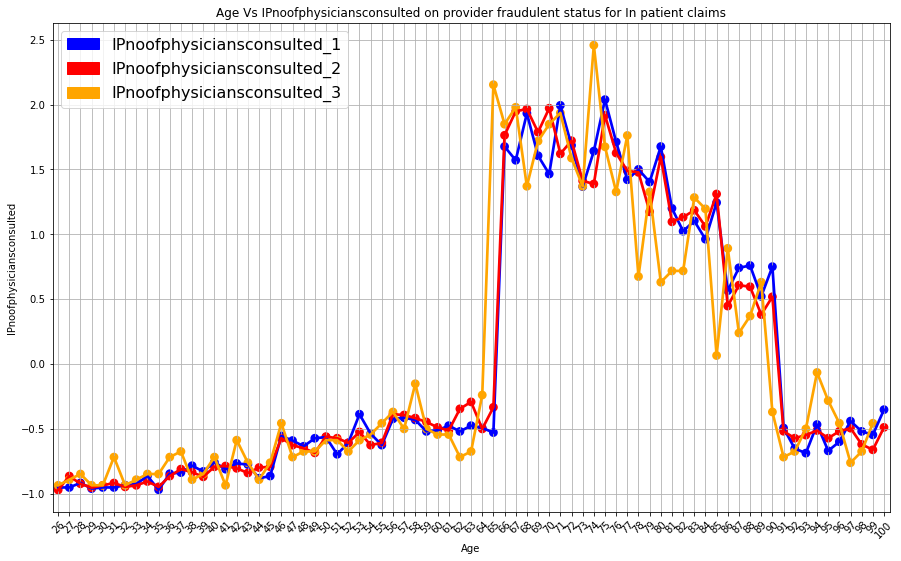

In [72]:
# Filtering the records which have fraudulent providers and noofphysiciansconsulted and then groupby on PatientAge
temp1 = IPdata.loc[(IPdata.providerfraudlabel == 1) & (IPdata.IPnoofphysiciansconsulted ==1)].groupby(['IPPatientage']).count()
temp1 = temp1.reset_index()

# Filtering the records which have fraudulent providers and noofphysiciansconsulted and then groupby on PatientAge
temp2 = IPdata.loc[(IPdata.providerfraudlabel == 1) & (IPdata.IPnoofphysiciansconsulted ==2)].groupby(['IPPatientage']).count()
temp2 = temp2.reset_index()

# Filtering the records which have fraudulent providers and noofphysiciansconsulted and then groupby on PatientAge
temp3 = IPdata.loc[(IPdata.providerfraudlabel == 1) & (IPdata.IPnoofphysiciansconsulted ==3)].groupby(['IPPatientage']).count()
temp3 = temp3.reset_index()

#Normalize the data, i.e. zero mean and unit std. I did this to be able to compare the shapes of both graphs, since 
#they have different ranges
normalised_df = pd.DataFrame()

normalised_df['IPnoofphysiciansconsulted_1'] = temp1['IPnoofphysiciansconsulted']
normalised_df['IPnoofphysiciansconsulted_2'] = temp2['IPnoofphysiciansconsulted']
normalised_df['IPnoofphysiciansconsulted_3'] = temp3['IPnoofphysiciansconsulted']
normalised_df = (normalised_df - normalised_df.mean()) / normalised_df.std()#(normalised_df.max() - normalised_df.min()) 
normalised_df['age'] = temp1['IPPatientage']


#Plot
plt.figure(figsize=(15, 9))
ax = sns.pointplot(x = normalised_df.age, y = normalised_df.IPnoofphysiciansconsulted_1, color = 'blue', label='IPnoofphysiciansconsulted_1')
ax = sns.pointplot(x = normalised_df.age, y = normalised_df.IPnoofphysiciansconsulted_2, color = 'red', label='IPnoofphysiciansconsulted_2')
ax = sns.pointplot(x = normalised_df.age, y = normalised_df.IPnoofphysiciansconsulted_3, color = 'orange', label='IPnoofphysiciansconsulted_3')

blue_patch = mpatches.Patch(color='blue', label='IPnoofphysiciansconsulted_1')
red_patch = mpatches.Patch(color='red', label='IPnoofphysiciansconsulted_2')
orange_patch = mpatches.Patch(color='orange', label='IPnoofphysiciansconsulted_3')
plt.legend(handles=[blue_patch, red_patch, orange_patch], loc='upper left', fontsize = 16)
plt.grid()
plt.xlabel("Age")
plt.ylabel("IPnoofphysiciansconsulted")
plt.title("Age Vs IPnoofphysiciansconsulted on provider fraudulent status for In patient claims")

plt.xticks(rotation=45);

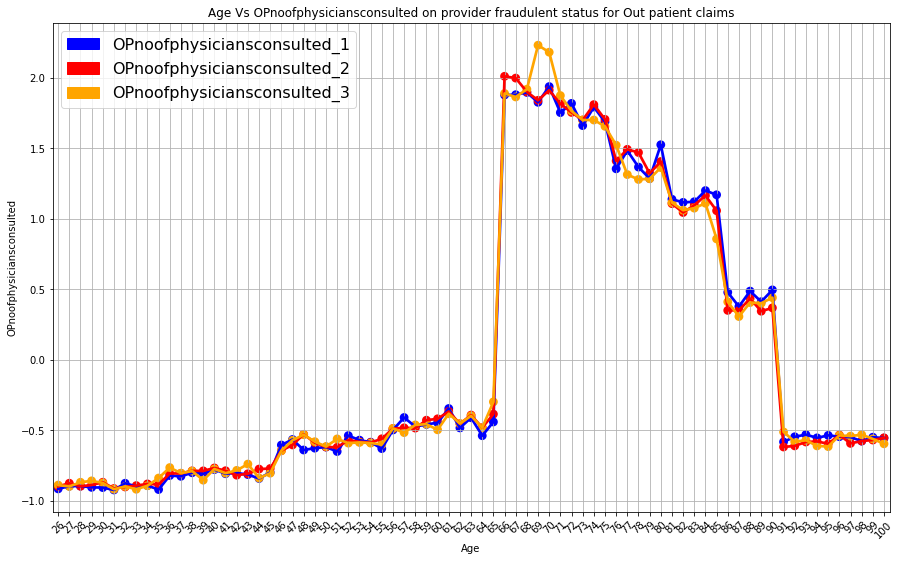

In [73]:
# Filtering the records which have fraudulent providers and noofphysiciansconsulted 1 and then groupby on PatientAge
temp1 = OPdata.loc[(OPdata.providerfraudlabel == 1) & (OPdata.OPnoofphysiciansconsulted ==1)].groupby(['OPPatientage']).count()
temp1 = temp1.reset_index()

# Filtering the records which have fraudulent providers and noofphysiciansconsulted 2 and then groupby on PatientAge
temp2 = OPdata.loc[(OPdata.providerfraudlabel == 1) & (OPdata.OPnoofphysiciansconsulted ==2)].groupby(['OPPatientage']).count()
temp2 = temp2.reset_index()

# Filtering the records which have fraudulent providers and noofphysiciansconsulted 3 and then groupby on PatientAge
temp3 = OPdata.loc[(OPdata.providerfraudlabel == 1) & (OPdata.OPnoofphysiciansconsulted ==3)].groupby(['OPPatientage']).count()
temp3 = temp3.reset_index()

#Normalize the data, i.e. zero mean and unit std. I did this to be able to compare the shapes of both graphs, since 
#they have different ranges
normalised_df = pd.DataFrame()

normalised_df['OPnoofphysiciansconsulted_1'] = temp1['OPnoofphysiciansconsulted']
normalised_df['OPnoofphysiciansconsulted_2'] = temp2['OPnoofphysiciansconsulted']
normalised_df['OPnoofphysiciansconsulted_3'] = temp3['OPnoofphysiciansconsulted']
normalised_df = (normalised_df - normalised_df.mean()) / normalised_df.std()#(normalised_df.max() - normalised_df.min()) 
normalised_df['age'] = temp1['OPPatientage']


#Plot
plt.figure(figsize=(15, 9))
ax = sns.pointplot(x = normalised_df.age, y = normalised_df.OPnoofphysiciansconsulted_1, color = 'blue', label='OPnoofphysiciansconsulted_1')
ax = sns.pointplot(x = normalised_df.age, y = normalised_df.OPnoofphysiciansconsulted_2, color = 'red', label='OPnoofphysiciansconsulted_2')
ax = sns.pointplot(x = normalised_df.age, y = normalised_df.OPnoofphysiciansconsulted_3, color = 'orange', label='OPnoofphysiciansconsulted_3')

blue_patch = mpatches.Patch(color='blue', label='OPnoofphysiciansconsulted_1')
red_patch = mpatches.Patch(color='red', label='OPnoofphysiciansconsulted_2')
orange_patch = mpatches.Patch(color='orange', label='OPnoofphysiciansconsulted_3')
plt.legend(handles=[blue_patch, red_patch, orange_patch], loc='upper left', fontsize = 16)
plt.grid()
plt.xlabel("Age")
plt.ylabel("OPnoofphysiciansconsulted")
plt.title("Age Vs OPnoofphysiciansconsulted on provider fraudulent status for Out patient claims")

plt.xticks(rotation=45);

#### Observation Age vs noofphysiciansconsulted on provider fraudulent status

* All 3 distributions overlapping a lot. Not much information.

### 3.3.2.4 No of procedures Vs Age on provider fraudulent status

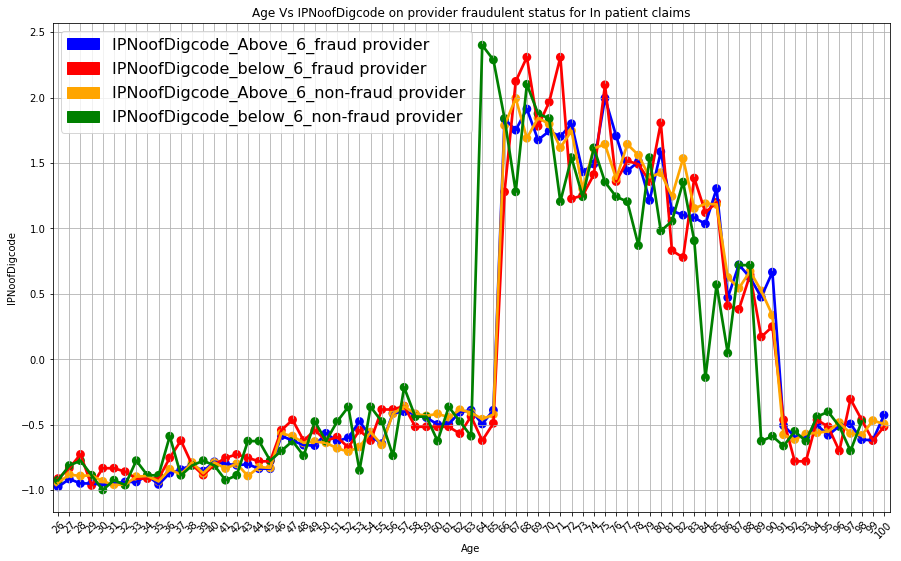

In [74]:
# Filtering the records which have fraudulent providers and NoofDigcode greater than or equal to 6 and then groupby on PatientAge
temp1 = IPdata.loc[(IPdata.providerfraudlabel == 1) & (IPdata.IPNoofDigcode >= 6)].groupby(['IPPatientage']).count()
temp1 = temp1.reset_index()

# Filtering the records which have fraudulent providers and NoofDigcode lesser than 6 and then groupby on PatientAge
temp2 = IPdata.loc[(IPdata.providerfraudlabel == 1) & (IPdata.IPNoofDigcode < 6)].groupby(['IPPatientage']).count()
temp2 = temp2.reset_index()

temp3 = IPdata.loc[(IPdata.providerfraudlabel == 0) & (IPdata.IPNoofDigcode >= 6)].groupby(['IPPatientage']).count()
temp3 = temp3.reset_index()

# Filtering the records which have fraudulent providers and NoofDigcode lesser than 6 and then groupby on PatientAge
temp4 = IPdata.loc[(IPdata.providerfraudlabel == 0) & (IPdata.IPNoofDigcode < 6)].groupby(['IPPatientage']).count()
temp4 = temp4.reset_index()


#Normalize the data, i.e. zero mean and unit std. I did this to be able to compare the shapes of both graphs, since 
#they have different ranges
normalised_df = pd.DataFrame()

normalised_df['IPNoofDigcode_Above_6'] = temp1['IPNoofDigcode']
normalised_df['IPNoofDigcode_below_6'] = temp2['IPNoofDigcode']
normalised_df['IPNoofDigcode_Above_6_NP'] = temp3['IPNoofDigcode']
normalised_df['IPNoofDigcode_below_6_NP'] = temp4['IPNoofDigcode']
normalised_df = (normalised_df - normalised_df.mean()) / normalised_df.std()#(normalised_df.max() - normalised_df.min()) 
normalised_df['age'] = temp1['IPPatientage']


#Plot
plt.figure(figsize=(15, 9))
ax = sns.pointplot(x = normalised_df.age, y = normalised_df.IPNoofDigcode_Above_6, color = 'blue')
ax = sns.pointplot(x = normalised_df.age, y = normalised_df.IPNoofDigcode_below_6, color = 'red')
ax = sns.pointplot(x = normalised_df.age, y = normalised_df.IPNoofDigcode_Above_6_NP, color = 'orange')
ax = sns.pointplot(x = normalised_df.age, y = normalised_df.IPNoofDigcode_below_6_NP, color = 'green')

blue_patch = mpatches.Patch(color='blue', label='IPNoofDigcode_Above_6_fraud provider')
red_patch = mpatches.Patch(color='red', label='IPNoofDigcode_below_6_fraud provider')
orange_patch = mpatches.Patch(color='orange', label='IPNoofDigcode_Above_6_non-fraud provider')
green_patch = mpatches.Patch(color='green', label='IPNoofDigcode_below_6_non-fraud provider')
plt.legend(handles=[blue_patch, red_patch, orange_patch, green_patch], loc='upper left', fontsize = 16)
plt.grid()
plt.xlabel("Age")
plt.ylabel("IPNoofDigcode")
plt.title("Age Vs IPNoofDigcode on provider fraudulent status for In patient claims")

plt.xticks(rotation=45);

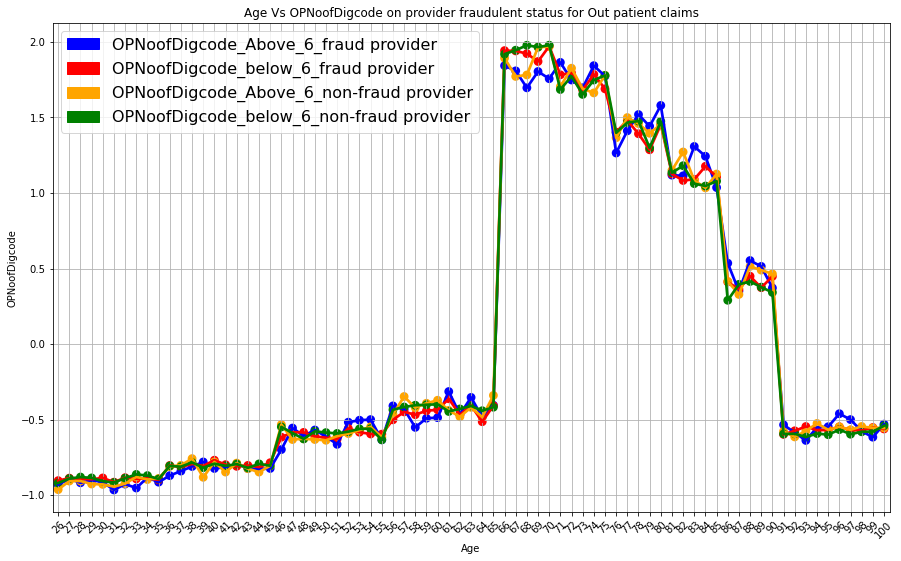

In [75]:
# Filtering the records which have fraudulent providers and NoofDigcode greater than or equal to 6 and then groupby on PatientAge
temp1 = OPdata.loc[(OPdata.providerfraudlabel == 1) & (OPdata.OPNoofDigcode >= 6)].groupby(['OPPatientage']).count()
temp1 = temp1.reset_index()

# Filtering the records which have fraudulent providers and NoofDigcode lesser than 6 and then groupby on PatientAge
temp2 = OPdata.loc[(OPdata.providerfraudlabel == 1) & (OPdata.OPNoofDigcode < 6)].groupby(['OPPatientage']).count()
temp2 = temp2.reset_index()

temp3 = OPdata.loc[(OPdata.providerfraudlabel == 0) & (OPdata.OPNoofDigcode >= 6)].groupby(['OPPatientage']).count()
temp3 = temp3.reset_index()

# Filtering the records which have fraudulent providers and NoofDigcode lesser than 6 and then groupby on PatientAge
temp4 = OPdata.loc[(OPdata.providerfraudlabel == 0) & (OPdata.OPNoofDigcode < 6)].groupby(['OPPatientage']).count()
temp4 = temp4.reset_index()


#Normalize the data, i.e. zero mean and unit std. I did this to be able to compare the shapes of both graphs, since 
#they have different ranges
normalised_df = pd.DataFrame()

normalised_df['OPNoofDigcode_Above_6'] = temp1['OPNoofDigcode']
normalised_df['OPNoofDigcode_below_6'] = temp2['OPNoofDigcode']
normalised_df['OPNoofDigcode_Above_6_NP'] = temp3['OPNoofDigcode']
normalised_df['OPNoofDigcode_below_6_NP'] = temp4['OPNoofDigcode']
normalised_df = (normalised_df - normalised_df.mean()) / normalised_df.std()#(normalised_df.max() - normalised_df.min()) 
normalised_df['age'] = temp1['OPPatientage']


#Plot
plt.figure(figsize=(15, 9))
ax = sns.pointplot(x = normalised_df.age, y = normalised_df.OPNoofDigcode_Above_6, color = 'blue')
ax = sns.pointplot(x = normalised_df.age, y = normalised_df.OPNoofDigcode_below_6, color = 'red')
ax = sns.pointplot(x = normalised_df.age, y = normalised_df.OPNoofDigcode_Above_6_NP, color = 'orange')
ax = sns.pointplot(x = normalised_df.age, y = normalised_df.OPNoofDigcode_below_6_NP, color = 'green')

blue_patch = mpatches.Patch(color='blue', label='OPNoofDigcode_Above_6_fraud provider')
red_patch = mpatches.Patch(color='red', label='OPNoofDigcode_below_6_fraud provider')
orange_patch = mpatches.Patch(color='orange', label='OPNoofDigcode_Above_6_non-fraud provider')
green_patch = mpatches.Patch(color='green', label='OPNoofDigcode_below_6_non-fraud provider')
plt.legend(handles=[blue_patch, red_patch, orange_patch, green_patch], loc='upper left', fontsize = 16)
plt.grid()
plt.xlabel("Age")
plt.ylabel("OPNoofDigcode")
plt.title("Age Vs OPNoofDigcode on provider fraudulent status for Out patient claims")

plt.xticks(rotation=45);

#### Observation Age vs NoofDigcode on provider fraudulent status

* At age 71 & No of procedures below 6 - more no of fraudulent cases filed for In patient claims
* The patient who taken no of procedures less than 6 involved more fraudulent cases than the patient who taken no of procedures greater than 6 for In patient claims
* All data perfectly overlapping for out patient claims

### 3.3.2.5 Whether the patient who stays more than 20 days involve more frauduluent cases than other?

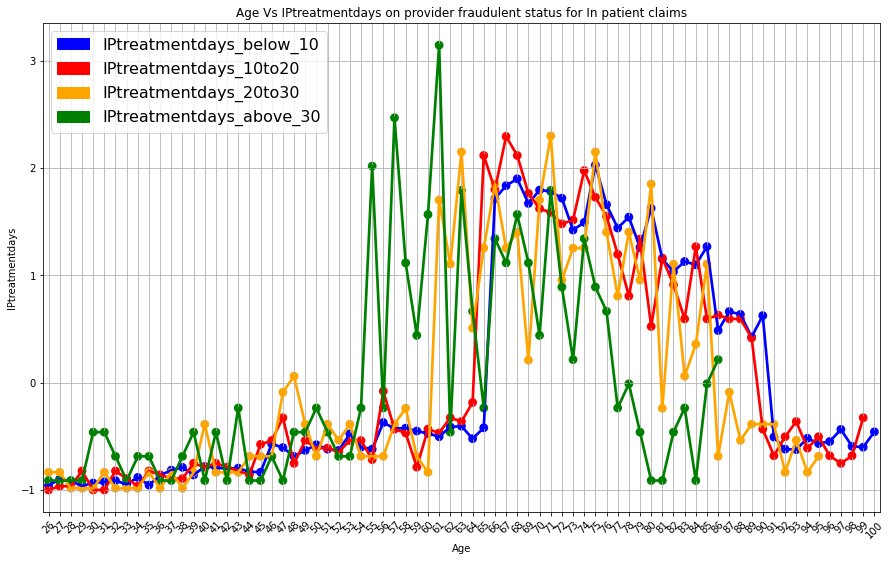

In [76]:
# Filtering the records which have fraudulent providers and NoofDigcode greater than or equal to 6 and then groupby on PatientAge
temp1 = IPdata.loc[(IPdata.providerfraudlabel == 1) & (IPdata.IPtreatmentdays <= 10)].groupby(['IPPatientage']).count()
temp1 = temp1.reset_index()

# Filtering the records which have fraudulent providers and NoofDigcode lesser than 6 and then groupby on PatientAge
temp2 = IPdata.loc[(IPdata.providerfraudlabel == 1) & (IPdata.IPtreatmentdays > 10) & (IPdata.IPtreatmentdays <= 20)].groupby(['IPPatientage']).count()
temp2 = temp2.reset_index()

temp3 = IPdata.loc[(IPdata.providerfraudlabel == 1) & (IPdata.IPtreatmentdays > 20) & (IPdata.IPtreatmentdays <= 30)].groupby(['IPPatientage']).count()
temp3 = temp3.reset_index()

temp4 = IPdata.loc[(IPdata.providerfraudlabel == 1) & (IPdata.IPtreatmentdays > 30)].groupby(['IPPatientage']).count()
temp4 = temp4.reset_index()


#Normalize the data, i.e. zero mean and unit std. I did this to be able to compare the shapes of both graphs, since 
#they have different ranges
normalised_df = pd.DataFrame()

normalised_df['IPtreatmentdays_below_10'] = temp1['IPtreatmentdays']
normalised_df['IPtreatmentdays_10to20'] = temp2['IPtreatmentdays']
normalised_df['IPtreatmentdays_20to30'] = temp3['IPtreatmentdays']
normalised_df['IPtreatmentdays_30to40'] = temp4['IPtreatmentdays']
normalised_df = (normalised_df - normalised_df.mean()) / normalised_df.std()#(normalised_df.max() - normalised_df.min()) 
normalised_df['age'] = temp1['IPPatientage']


#Plot
plt.figure(figsize=(15, 9))
ax = sns.pointplot(x = normalised_df.age, y = normalised_df.IPtreatmentdays_below_10, color = 'blue')
ax = sns.pointplot(x = normalised_df.age, y = normalised_df.IPtreatmentdays_10to20, color = 'red')
ax = sns.pointplot(x = normalised_df.age, y = normalised_df.IPtreatmentdays_20to30, color = 'orange')
ax = sns.pointplot(x = normalised_df.age, y = normalised_df.IPtreatmentdays_30to40, color = 'green')


blue_patch = mpatches.Patch(color='blue', label='IPtreatmentdays_below_10')
red_patch = mpatches.Patch(color='red', label='IPtreatmentdays_10to20')
orange_patch = mpatches.Patch(color='orange', label='IPtreatmentdays_20to30')
green_patch = mpatches.Patch(color='green', label='IPtreatmentdays_above_30')
plt.legend(handles=[blue_patch, red_patch, orange_patch, green_patch], loc='upper left', fontsize = 16)
plt.grid()
plt.xlabel("Age")
plt.ylabel("IPtreatmentdays")
plt.title("Age Vs IPtreatmentdays on provider fraudulent status for In patient claims")

plt.xticks(rotation=45);

#### Observation - Treatment days Vs Age on provider fraudulent status for in patient claims

* The patient who has age 54 to 70 and Treatment days more than 30 days - tend to involve more fraud cases
* Fraudulent cases prportional to Treatment days. More no fraud cases filed for the patient who treatment days > 20 days.
* At age 60 the patient who has taken treatement > 30 days, involved more fraudulent.

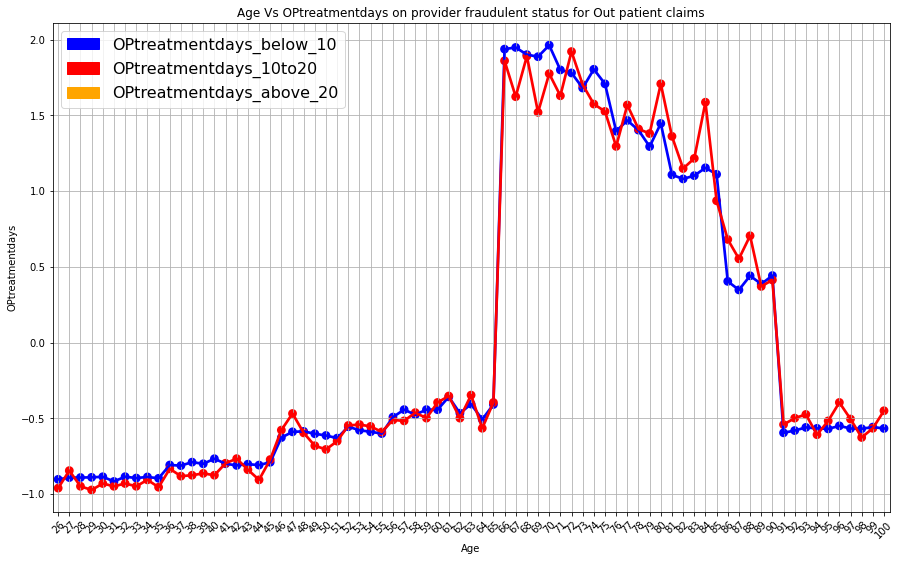

In [77]:
# Filtering the records which have fraudulent providers and NoofDigcode greater than or equal to 6 and then groupby on PatientAge
temp1 = OPdata.loc[(OPdata.providerfraudlabel == 1) & (OPdata.OPtreatmentdays <= 10)].groupby(['OPPatientage']).count()
temp1 = temp1.reset_index()

# Filtering the records which have fraudulent providers and NoofDigcode lesser than 6 and then groupby on PatientAge
temp2 = OPdata.loc[(OPdata.providerfraudlabel == 1) & (OPdata.OPtreatmentdays > 10) & (OPdata.OPtreatmentdays <= 20)].groupby(['OPPatientage']).count()
temp2 = temp2.reset_index()

temp3 = OPdata.loc[(OPdata.providerfraudlabel == 1) & (OPdata.OPtreatmentdays > 20)].groupby(['OPPatientage']).count()
temp3 = temp3.reset_index()


#Normalize the data, i.e. zero mean and unit std. I did this to be able to compare the shapes of both graphs, since 
#they have different ranges
normalised_df = pd.DataFrame()

normalised_df['OPtreatmentdays_below_10'] = temp1['OPtreatmentdays']
normalised_df['OPtreatmentdays_10to20'] = temp2['OPtreatmentdays']
normalised_df['OPtreatmentdays_above_20'] = temp3['OPtreatmentdays']
normalised_df = (normalised_df - normalised_df.mean()) / normalised_df.std()#(normalised_df.max() - normalised_df.min()) 
normalised_df['age'] = temp1['OPPatientage']


#Plot
plt.figure(figsize=(15, 9))
ax = sns.pointplot(x = normalised_df.age, y = normalised_df.OPtreatmentdays_below_10, color = 'blue')
ax = sns.pointplot(x = normalised_df.age, y = normalised_df.OPtreatmentdays_10to20, color = 'red')
ax = sns.pointplot(x = normalised_df.age, y = normalised_df.OPtreatmentdays_above_20, color = 'orange')


blue_patch = mpatches.Patch(color='blue', label='OPtreatmentdays_below_10')
red_patch = mpatches.Patch(color='red', label='OPtreatmentdays_10to20')
orange_patch = mpatches.Patch(color='orange', label='OPtreatmentdays_above_20')
plt.legend(handles=[blue_patch, red_patch, orange_patch], loc='upper left', fontsize = 16)
plt.grid()
plt.xlabel("Age")
plt.ylabel("OPtreatmentdays")
plt.title("Age Vs OPtreatmentdays on provider fraudulent status for Out patient claims")

plt.xticks(rotation=45);

#### Observation - Treatment days Vs Age on provider fraudulent status for Out patient claims

* Zero fraudulent cases for out patient claims if treatement days > 20
* More no of fraudulent cases filed if patient age 65 to 89 & Treatement days < 20 days,

### 3.3.2.6 Gender Vs Treatmentdays on provider fraudulent status

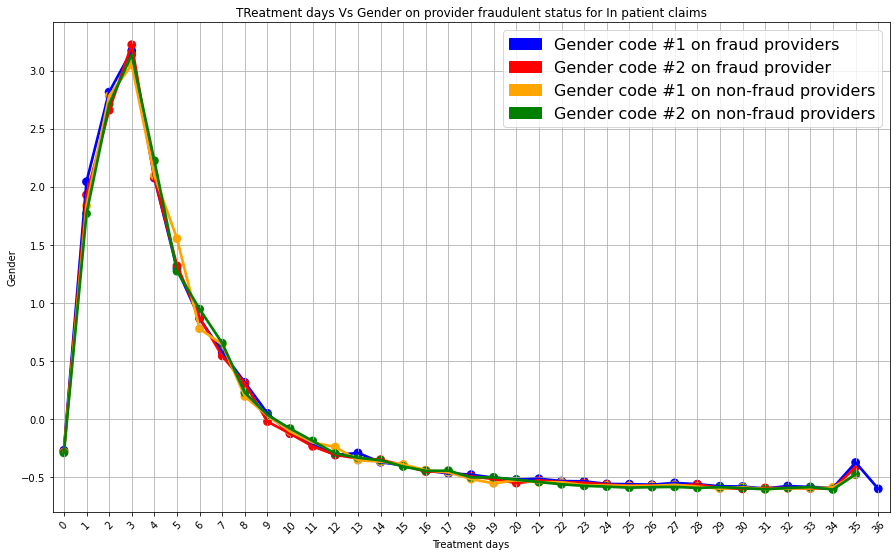

In [78]:
# Filtering the records which have fraudulent providers and Gender 1 and then groupby on IPtreatmentdays
temp1 = IPdata.loc[(IPdata.providerfraudlabel == 1) & (IPdata.Gender ==1)].groupby(['IPtreatmentdays']).count()
temp1 = temp1.reset_index()

# Filtering the records which have fraudulent providers and Gender 2 and then groupby on IPtreatmentdays
temp2 = IPdata.loc[(IPdata.providerfraudlabel == 1) & (IPdata.Gender ==2)].groupby(['IPtreatmentdays']).count()
temp2 = temp2.reset_index()

temp3 = IPdata.loc[(IPdata.providerfraudlabel == 0) & (IPdata.Gender ==1)].groupby(['IPtreatmentdays']).count()
temp3 = temp3.reset_index()

# Filtering the records which have fraudulent providers and Gender 2 and then groupby on IPtreatmentdays
temp4 = IPdata.loc[(IPdata.providerfraudlabel == 0) & (IPdata.Gender ==2)].groupby(['IPtreatmentdays']).count()
temp4 = temp4.reset_index()

#Normalize the data, i.e. zero mean and unit std. I did this to be able to compare the shapes of both graphs, since 
#they have different ranges
normalised_df = pd.DataFrame()

normalised_df['Gender_1'] = temp1['Gender']
normalised_df['Gender_2'] = temp2['Gender']
normalised_df['Gender_1_NP'] = temp3['Gender']
normalised_df['Gender_2_NP'] = temp4['Gender']
normalised_df = (normalised_df - normalised_df.mean()) / normalised_df.std()#(normalised_df.max() - normalised_df.min()) 
normalised_df['treatmentdays'] = temp1['IPtreatmentdays']


#Plot
plt.figure(figsize=(15, 9))
ax = sns.pointplot(x = normalised_df.treatmentdays, y = normalised_df.Gender_1, color = 'blue')
ax = sns.pointplot(x = normalised_df.treatmentdays, y = normalised_df.Gender_2, color = 'red')
ax = sns.pointplot(x = normalised_df.treatmentdays, y = normalised_df.Gender_1_NP, color = 'orange')
ax = sns.pointplot(x = normalised_df.treatmentdays, y = normalised_df.Gender_2_NP, color = 'green')

blue_patch = mpatches.Patch(color='blue', label='Gender code #1 on fraud providers')
red_patch = mpatches.Patch(color='red', label='Gender code #2 on fraud provider')
orange_patch = mpatches.Patch(color='orange', label='Gender code #1 on non-fraud providers')
green_patch = mpatches.Patch(color='green', label='Gender code #2 on non-fraud providers')
plt.legend(handles=[blue_patch, red_patch, orange_patch, green_patch], loc='upper right', fontsize = 16)
plt.grid()
plt.xlabel("Treatment days")
plt.ylabel("Gender")
plt.title("TReatment days Vs Gender on provider fraudulent status for In patient claims")

plt.xticks(rotation=45);

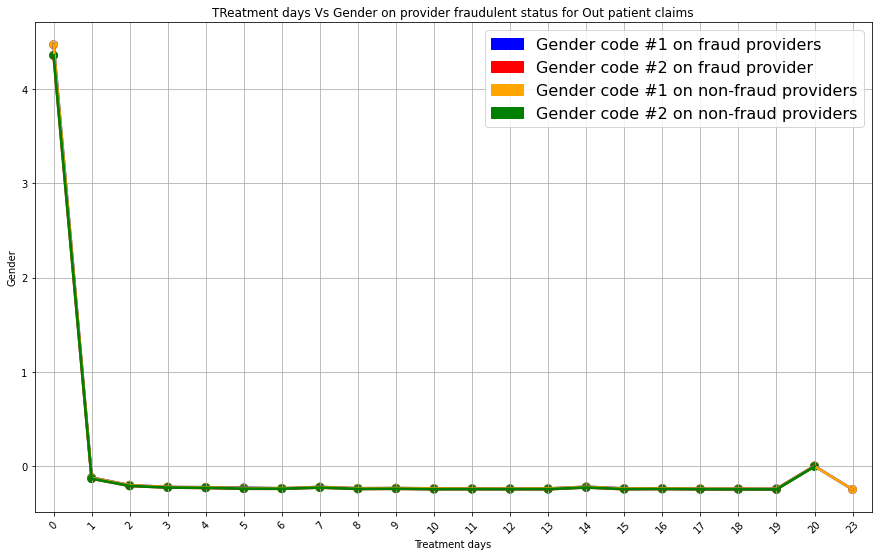

In [79]:
# Filtering the records which have fraudulent providers and Gender 1 and then groupby on OPtreatmentdays
temp1 = OPdata.loc[(OPdata.providerfraudlabel == 1) & (OPdata.Gender ==1)].groupby(['OPtreatmentdays']).count()
temp1 = temp1.reset_index()

# Filtering the records which have fraudulent providers and Gender 2 and then groupby on OPtreatmentdays
temp2 = OPdata.loc[(OPdata.providerfraudlabel == 1) & (OPdata.Gender ==2)].groupby(['OPtreatmentdays']).count()
temp2 = temp2.reset_index()

temp3 = OPdata.loc[(OPdata.providerfraudlabel == 0) & (OPdata.Gender ==1)].groupby(['OPtreatmentdays']).count()
temp3 = temp3.reset_index()

# Filtering the records which have fraudulent providers and Gender 2 and then groupby on OPtreatmentdays
temp4 = OPdata.loc[(OPdata.providerfraudlabel == 0) & (OPdata.Gender ==2)].groupby(['OPtreatmentdays']).count()
temp4 = temp4.reset_index()

#Normalize the data, i.e. zero mean and unit std. I did this to be able to compare the shapes of both graphs, since 
#they have different ranges
normalised_df = pd.DataFrame()

normalised_df['Gender_1'] = temp1['Gender']
normalised_df['Gender_2'] = temp2['Gender']
normalised_df['Gender_1_NP'] = temp3['Gender']
normalised_df['Gender_2_NP'] = temp4['Gender']
normalised_df = (normalised_df - normalised_df.mean()) / normalised_df.std()#(normalised_df.max() - normalised_df.min()) 
normalised_df['treatmentdays'] = temp1['OPtreatmentdays']


#Plot
plt.figure(figsize=(15, 9))
ax = sns.pointplot(x = normalised_df.treatmentdays, y = normalised_df.Gender_1, color = 'blue')
ax = sns.pointplot(x = normalised_df.treatmentdays, y = normalised_df.Gender_2, color = 'red')
ax = sns.pointplot(x = normalised_df.treatmentdays, y = normalised_df.Gender_1_NP, color = 'orange')
ax = sns.pointplot(x = normalised_df.treatmentdays, y = normalised_df.Gender_2_NP, color = 'green')

blue_patch = mpatches.Patch(color='blue', label='Gender code #1 on fraud providers')
red_patch = mpatches.Patch(color='red', label='Gender code #2 on fraud provider')
orange_patch = mpatches.Patch(color='orange', label='Gender code #1 on non-fraud providers')
green_patch = mpatches.Patch(color='green', label='Gender code #2 on non-fraud providers')
plt.legend(handles=[blue_patch, red_patch, orange_patch, green_patch], loc='upper right', fontsize = 16)
plt.grid()
plt.xlabel("Treatment days")
plt.ylabel("Gender")
plt.title("TReatment days Vs Gender on provider fraudulent status for Out patient claims")

plt.xticks(rotation=45);

#### Observation- Gender Vs Treatmentdays on provider fraudulent status

* Both fraudulent & non-fraudulent data overlapping a lot.
* Treatment days - 2 to 10 - more no of fraud cases filed for In patient claims
* Not much useful info

### 3.3.2.7 Treatment days vs Noof procedure on provider fraudulent status

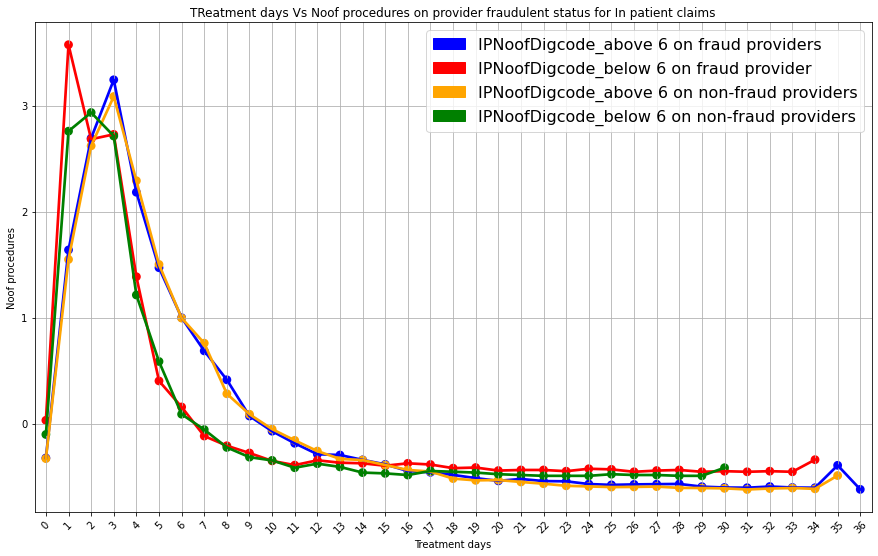

In [80]:
# Filtering the records which have fraudulent providers and Gender 1 and then groupby on IPtreatmentdays
temp1 = IPdata.loc[(IPdata.providerfraudlabel == 1) & (IPdata.IPNoofDigcode >=6)].groupby(['IPtreatmentdays']).count()
temp1 = temp1.reset_index()

# Filtering the records which have fraudulent providers and Gender 2 and then groupby on IPtreatmentdays
temp2 = IPdata.loc[(IPdata.providerfraudlabel == 1) & (IPdata.IPNoofDigcode < 6)].groupby(['IPtreatmentdays']).count()
temp2 = temp2.reset_index()

temp3 = IPdata.loc[(IPdata.providerfraudlabel == 0) & (IPdata.IPNoofDigcode >= 6)].groupby(['IPtreatmentdays']).count()
temp3 = temp3.reset_index()

# Filtering the records which have fraudulent providers and Gender 2 and then groupby on IPtreatmentdays
temp4 = IPdata.loc[(IPdata.providerfraudlabel == 0) & (IPdata.IPNoofDigcode < 6)].groupby(['IPtreatmentdays']).count()
temp4 = temp4.reset_index()

#Normalize the data, i.e. zero mean and unit std. I did this to be able to compare the shapes of both graphs, since 
#they have different ranges
normalised_df = pd.DataFrame()

normalised_df['IPNoofDigcode_above6'] = temp1['IPNoofDigcode']
normalised_df['IPNoofDigcode_below6'] = temp2['IPNoofDigcode']
normalised_df['IPNoofDigcode_above6_NP'] = temp3['IPNoofDigcode']
normalised_df['IPNoofDigcode_below6_NP'] = temp4['IPNoofDigcode']
normalised_df = (normalised_df - normalised_df.mean()) / normalised_df.std()#(normalised_df.max() - normalised_df.min()) 
normalised_df['treatmentdays'] = temp1['IPtreatmentdays']


#Plot
plt.figure(figsize=(15, 9))
ax = sns.pointplot(x = normalised_df.treatmentdays, y = normalised_df.IPNoofDigcode_above6, color = 'blue')
ax = sns.pointplot(x = normalised_df.treatmentdays, y = normalised_df.IPNoofDigcode_below6, color = 'red')
ax = sns.pointplot(x = normalised_df.treatmentdays, y = normalised_df.IPNoofDigcode_above6_NP, color = 'orange')
ax = sns.pointplot(x = normalised_df.treatmentdays, y = normalised_df.IPNoofDigcode_below6_NP, color = 'green')

blue_patch = mpatches.Patch(color='blue', label='IPNoofDigcode_above 6 on fraud providers')
red_patch = mpatches.Patch(color='red', label='IPNoofDigcode_below 6 on fraud provider')
orange_patch = mpatches.Patch(color='orange', label='IPNoofDigcode_above 6 on non-fraud providers')
green_patch = mpatches.Patch(color='green', label='IPNoofDigcode_below 6 on non-fraud providers')
plt.legend(handles=[blue_patch, red_patch, orange_patch, green_patch], loc='upper right', fontsize = 16)
plt.grid()
plt.xlabel("Treatment days")
plt.ylabel("Noof procedures")
plt.title("TReatment days Vs Noof procedures on provider fraudulent status for In patient claims")

plt.xticks(rotation=45);

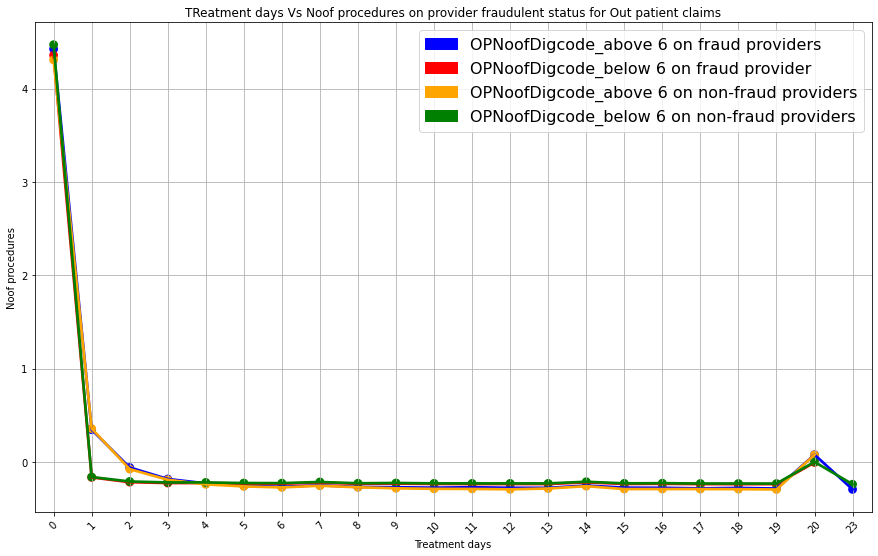

In [81]:
# Filtering the records which have fraudulent providers and Gender 1 and then groupby on OPtreatmentdays
temp1 = OPdata.loc[(OPdata.providerfraudlabel == 1) & (OPdata.OPNoofDigcode >=6)].groupby(['OPtreatmentdays']).count()
temp1 = temp1.reset_index()

# Filtering the records which have fraudulent providers and Gender 2 and then groupby on OPtreatmentdays
temp2 = OPdata.loc[(OPdata.providerfraudlabel == 1) & (OPdata.OPNoofDigcode < 6)].groupby(['OPtreatmentdays']).count()
temp2 = temp2.reset_index()

temp3 = OPdata.loc[(OPdata.providerfraudlabel == 0) & (OPdata.OPNoofDigcode >= 6)].groupby(['OPtreatmentdays']).count()
temp3 = temp3.reset_index()

# Filtering the records which have fraudulent providers and Gender 2 and then groupby on OPtreatmentdays
temp4 = OPdata.loc[(OPdata.providerfraudlabel == 0) & (OPdata.OPNoofDigcode < 6)].groupby(['OPtreatmentdays']).count()
temp4 = temp4.reset_index()

#Normalize the data, i.e. zero mean and unit std. I did this to be able to compare the shapes of both graphs, since 
#they have different ranges
normalised_df = pd.DataFrame()

normalised_df['OPNoofDigcode_above6'] = temp1['OPNoofDigcode']
normalised_df['OPNoofDigcode_below6'] = temp2['OPNoofDigcode']
normalised_df['OPNoofDigcode_above6_NP'] = temp3['OPNoofDigcode']
normalised_df['OPNoofDigcode_below6_NP'] = temp4['OPNoofDigcode']
normalised_df = (normalised_df - normalised_df.mean()) / normalised_df.std()#(normalised_df.max() - normalised_df.min()) 
normalised_df['treatmentdays'] = temp1['OPtreatmentdays']


#Plot
plt.figure(figsize=(15, 9))
ax = sns.pointplot(x = normalised_df.treatmentdays, y = normalised_df.OPNoofDigcode_above6, color = 'blue')
ax = sns.pointplot(x = normalised_df.treatmentdays, y = normalised_df.OPNoofDigcode_below6, color = 'red')
ax = sns.pointplot(x = normalised_df.treatmentdays, y = normalised_df.OPNoofDigcode_above6_NP, color = 'orange')
ax = sns.pointplot(x = normalised_df.treatmentdays, y = normalised_df.OPNoofDigcode_below6_NP, color = 'green')

blue_patch = mpatches.Patch(color='blue', label='OPNoofDigcode_above 6 on fraud providers')
red_patch = mpatches.Patch(color='red', label='OPNoofDigcode_below 6 on fraud provider')
orange_patch = mpatches.Patch(color='orange', label='OPNoofDigcode_above 6 on non-fraud providers')
green_patch = mpatches.Patch(color='green', label='OPNoofDigcode_below 6 on non-fraud providers')
plt.legend(handles=[blue_patch, red_patch, orange_patch, green_patch], loc='upper right', fontsize = 16)
plt.grid()
plt.xlabel("Treatment days")
plt.ylabel("Noof procedures")
plt.title("TReatment days Vs Noof procedures on provider fraudulent status for Out patient claims")

plt.xticks(rotation=45);

#### Observation - Treatment days vs Noof procedure on provider fraudulent status

* More fraudulent cases filed when treatement days -1 & No of procedure taken below 6 for In patient claims
* More fraudulent cases filed when treatement days -3 to 8 & No of procedure taken above 6 for In patient claims
* All data overlapping a lot for Out patient claims

###  3.3.2.8 Treatment days Vs No of physicians consulted on provider fraudulent status

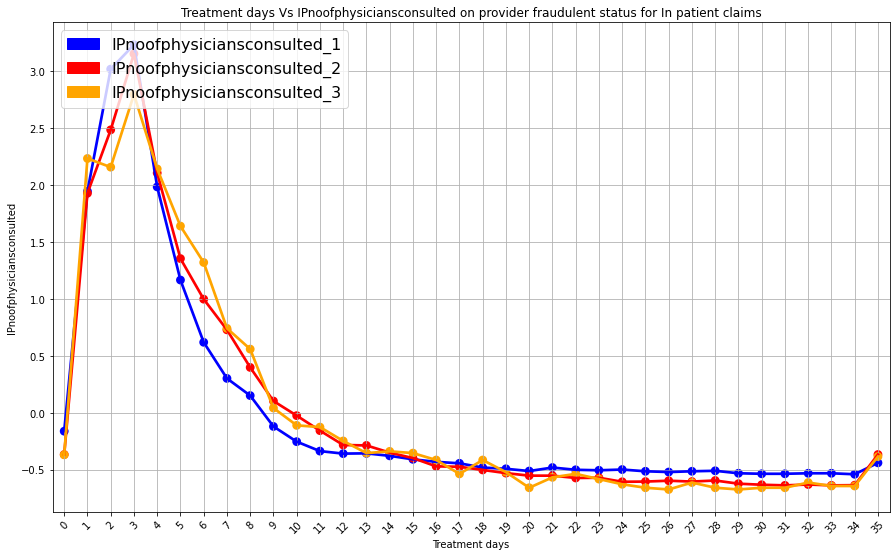

In [82]:
# Filtering the records which have fraudulent providers and noofphysiciansconsulted and then groupby on PatientAge
temp1 = IPdata.loc[(IPdata.providerfraudlabel == 1) & (IPdata.IPnoofphysiciansconsulted ==1)].groupby(['IPtreatmentdays']).count()
temp1 = temp1.reset_index()

# Filtering the records which have fraudulent providers and noofphysiciansconsulted and then groupby on PatientAge
temp2 = IPdata.loc[(IPdata.providerfraudlabel == 1) & (IPdata.IPnoofphysiciansconsulted ==2)].groupby(['IPtreatmentdays']).count()
temp2 = temp2.reset_index()

# Filtering the records which have fraudulent providers and noofphysiciansconsulted and then groupby on PatientAge
temp3 = IPdata.loc[(IPdata.providerfraudlabel == 1) & (IPdata.IPnoofphysiciansconsulted ==3)].groupby(['IPtreatmentdays']).count()
temp3 = temp3.reset_index()

#Normalize the data, i.e. zero mean and unit std. I did this to be able to compare the shapes of both graphs, since 
#they have different ranges
normalised_df = pd.DataFrame()

normalised_df['IPnoofphysiciansconsulted_1'] = temp1['IPnoofphysiciansconsulted']
normalised_df['IPnoofphysiciansconsulted_2'] = temp2['IPnoofphysiciansconsulted']
normalised_df['IPnoofphysiciansconsulted_3'] = temp3['IPnoofphysiciansconsulted']
normalised_df = (normalised_df - normalised_df.mean()) / normalised_df.std()#(normalised_df.max() - normalised_df.min()) 
normalised_df['treatmentdays'] = temp1['IPtreatmentdays']


#Plot
plt.figure(figsize=(15, 9))
ax = sns.pointplot(x = normalised_df.treatmentdays, y = normalised_df.IPnoofphysiciansconsulted_1, color = 'blue', label='IPnoofphysiciansconsulted_1')
ax = sns.pointplot(x = normalised_df.treatmentdays, y = normalised_df.IPnoofphysiciansconsulted_2, color = 'red', label='IPnoofphysiciansconsulted_2')
ax = sns.pointplot(x = normalised_df.treatmentdays, y = normalised_df.IPnoofphysiciansconsulted_3, color = 'orange', label='IPnoofphysiciansconsulted_3')

blue_patch = mpatches.Patch(color='blue', label='IPnoofphysiciansconsulted_1')
red_patch = mpatches.Patch(color='red', label='IPnoofphysiciansconsulted_2')
orange_patch = mpatches.Patch(color='orange', label='IPnoofphysiciansconsulted_3')
plt.legend(handles=[blue_patch, red_patch, orange_patch], loc='upper left', fontsize = 16)
plt.grid()
plt.xlabel("Treatment days")
plt.ylabel("IPnoofphysiciansconsulted")
plt.title("Treatment days Vs IPnoofphysiciansconsulted on provider fraudulent status for In patient claims")

plt.xticks(rotation=45);

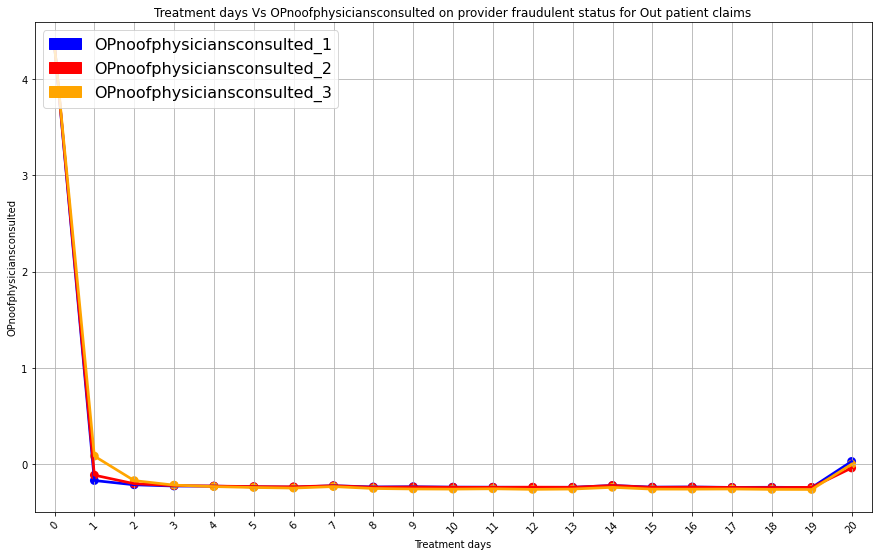

In [84]:
# Filtering the records which have fraudulent providers and noofphysiciansconsulted and then groupby on PatientAge
temp1 = OPdata.loc[(OPdata.providerfraudlabel == 1) & (OPdata.OPnoofphysiciansconsulted ==1)].groupby(['OPtreatmentdays']).count()
temp1 = temp1.reset_index()

# Filtering the records which have fraudulent providers and noofphysiciansconsulted and then groupby on PatientAge
temp2 = OPdata.loc[(OPdata.providerfraudlabel == 1) & (OPdata.OPnoofphysiciansconsulted ==2)].groupby(['OPtreatmentdays']).count()
temp2 = temp2.reset_index()

# Filtering the records which have fraudulent providers and noofphysiciansconsulted and then groupby on PatientAge
temp3 = OPdata.loc[(OPdata.providerfraudlabel == 1) & (OPdata.OPnoofphysiciansconsulted ==3)].groupby(['OPtreatmentdays']).count()
temp3 = temp3.reset_index()

#Normalize the data, i.e. zero mean and unit std. I did this to be able to compare the shapes of both graphs, since 
#they have different ranges
normalised_df = pd.DataFrame()

normalised_df['OPnoofphysiciansconsulted_1'] = temp1['OPnoofphysiciansconsulted']
normalised_df['OPnoofphysiciansconsulted_2'] = temp2['OPnoofphysiciansconsulted']
normalised_df['OPnoofphysiciansconsulted_3'] = temp3['OPnoofphysiciansconsulted']
normalised_df = (normalised_df - normalised_df.mean()) / normalised_df.std()#(normalised_df.max() - normalised_df.min()) 
normalised_df['treatmentdays'] = temp1['OPtreatmentdays']


#Plot
plt.figure(figsize=(15, 9))
ax = sns.pointplot(x = normalised_df.treatmentdays, y = normalised_df.OPnoofphysiciansconsulted_1, color = 'blue', label='OPnoofphysiciansconsulted_1')
ax = sns.pointplot(x = normalised_df.treatmentdays, y = normalised_df.OPnoofphysiciansconsulted_2, color = 'red', label='OPnoofphysiciansconsulted_2')
ax = sns.pointplot(x = normalised_df.treatmentdays, y = normalised_df.OPnoofphysiciansconsulted_3, color = 'orange', label='OPnoofphysiciansconsulted_3')

blue_patch = mpatches.Patch(color='blue', label='OPnoofphysiciansconsulted_1')
red_patch = mpatches.Patch(color='red', label='OPnoofphysiciansconsulted_2')
orange_patch = mpatches.Patch(color='orange', label='OPnoofphysiciansconsulted_3')
plt.legend(handles=[blue_patch, red_patch, orange_patch], loc='upper left', fontsize = 16)
plt.grid()
plt.xlabel("Treatment days")
plt.ylabel("OPnoofphysiciansconsulted")
plt.title("Treatment days Vs OPnoofphysiciansconsulted on provider fraudulent status for Out patient claims")

plt.xticks(rotation=45);

#### Observation - Treatment days vs Noof procedure on provider fraudulent status

* All data overlapping a lot. Not much useful.

### 3.3.2.9 No of physicians consulted Vs No of procedures on provider fraudulent

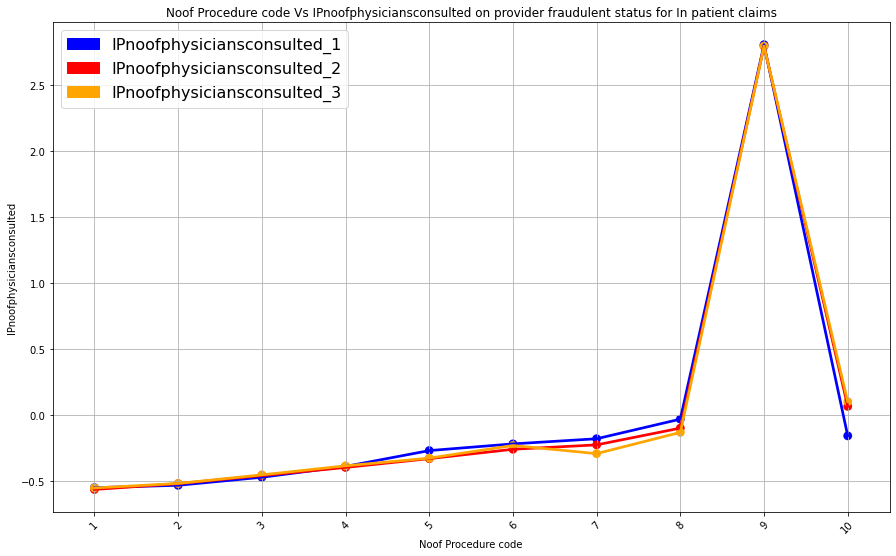

In [87]:
# Filtering the records which have fraudulent providers and noofphysiciansconsulted and then groupby on PatientAge
temp1 = IPdata.loc[(IPdata.providerfraudlabel == 1) & (IPdata.IPnoofphysiciansconsulted ==1)].groupby(['IPNoofDigcode']).count()
temp1 = temp1.reset_index()

# Filtering the records which have fraudulent providers and noofphysiciansconsulted and then groupby on PatientAge
temp2 = IPdata.loc[(IPdata.providerfraudlabel == 1) & (IPdata.IPnoofphysiciansconsulted ==2)].groupby(['IPNoofDigcode']).count()
temp2 = temp2.reset_index()

# Filtering the records which have fraudulent providers and noofphysiciansconsulted and then groupby on PatientAge
temp3 = IPdata.loc[(IPdata.providerfraudlabel == 1) & (IPdata.IPnoofphysiciansconsulted ==3)].groupby(['IPNoofDigcode']).count()
temp3 = temp3.reset_index()

#Normalize the data, i.e. zero mean and unit std. I did this to be able to compare the shapes of both graphs, since 
#they have different ranges
normalised_df = pd.DataFrame()

normalised_df['IPnoofphysiciansconsulted_1'] = temp1['IPnoofphysiciansconsulted']
normalised_df['IPnoofphysiciansconsulted_2'] = temp2['IPnoofphysiciansconsulted']
normalised_df['IPnoofphysiciansconsulted_3'] = temp3['IPnoofphysiciansconsulted']
normalised_df = (normalised_df - normalised_df.mean()) / normalised_df.std()#(normalised_df.max() - normalised_df.min()) 
normalised_df['NoofDigcode'] = temp1['IPNoofDigcode']


#Plot
plt.figure(figsize=(15, 9))
ax = sns.pointplot(x = normalised_df.NoofDigcode, y = normalised_df.IPnoofphysiciansconsulted_1, color = 'blue', label='IPnoofphysiciansconsulted_1')
ax = sns.pointplot(x = normalised_df.NoofDigcode, y = normalised_df.IPnoofphysiciansconsulted_2, color = 'red', label='IPnoofphysiciansconsulted_2')
ax = sns.pointplot(x = normalised_df.NoofDigcode, y = normalised_df.IPnoofphysiciansconsulted_3, color = 'orange', label='IPnoofphysiciansconsulted_3')

blue_patch = mpatches.Patch(color='blue', label='IPnoofphysiciansconsulted_1')
red_patch = mpatches.Patch(color='red', label='IPnoofphysiciansconsulted_2')
orange_patch = mpatches.Patch(color='orange', label='IPnoofphysiciansconsulted_3')
plt.legend(handles=[blue_patch, red_patch, orange_patch], loc='upper left', fontsize = 16)
plt.grid()
plt.xlabel("Noof Procedure code")
plt.ylabel("IPnoofphysiciansconsulted")
plt.title("Noof Procedure code Vs IPnoofphysiciansconsulted on provider fraudulent status for In patient claims")

plt.xticks(rotation=45);

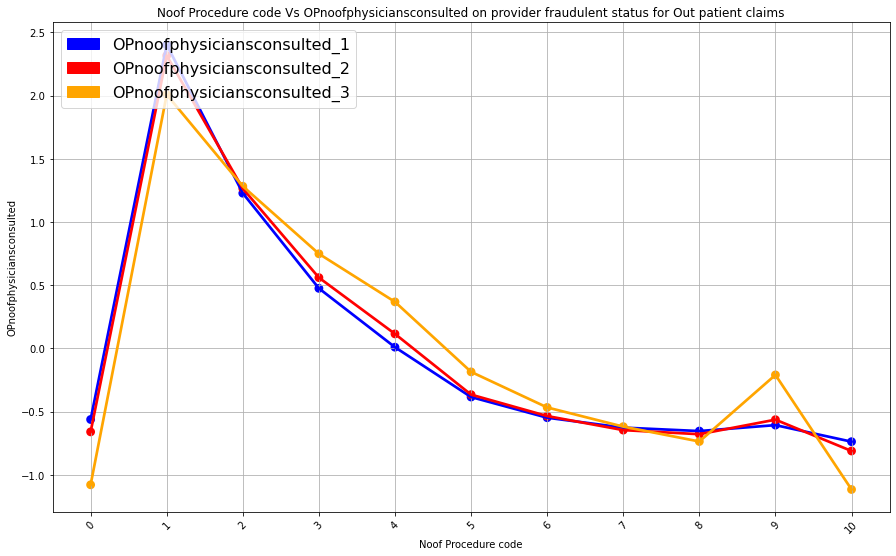

In [88]:
# Filtering the records which have fraudulent providers and noofphysiciansconsulted and then groupby on PatientAge
temp1 = OPdata.loc[(OPdata.providerfraudlabel == 1) & (OPdata.OPnoofphysiciansconsulted ==1)].groupby(['OPNoofDigcode']).count()
temp1 = temp1.reset_index()

# Filtering the records which have fraudulent providers and noofphysiciansconsulted and then groupby on PatientAge
temp2 = OPdata.loc[(OPdata.providerfraudlabel == 1) & (OPdata.OPnoofphysiciansconsulted ==2)].groupby(['OPNoofDigcode']).count()
temp2 = temp2.reset_index()

# Filtering the records which have fraudulent providers and noofphysiciansconsulted and then groupby on PatientAge
temp3 = OPdata.loc[(OPdata.providerfraudlabel == 1) & (OPdata.OPnoofphysiciansconsulted ==3)].groupby(['OPNoofDigcode']).count()
temp3 = temp3.reset_index()

#Normalize the data, i.e. zero mean and unit std. I did this to be able to compare the shapes of both graphs, since 
#they have different ranges
normalised_df = pd.DataFrame()

normalised_df['OPnoofphysiciansconsulted_1'] = temp1['OPnoofphysiciansconsulted']
normalised_df['OPnoofphysiciansconsulted_2'] = temp2['OPnoofphysiciansconsulted']
normalised_df['OPnoofphysiciansconsulted_3'] = temp3['OPnoofphysiciansconsulted']
normalised_df = (normalised_df - normalised_df.mean()) / normalised_df.std()#(normalised_df.max() - normalised_df.min()) 
normalised_df['NoofDigcode'] = temp1['OPNoofDigcode']


#Plot
plt.figure(figsize=(15, 9))
ax = sns.pointplot(x = normalised_df.NoofDigcode, y = normalised_df.OPnoofphysiciansconsulted_1, color = 'blue', label='OPnoofphysiciansconsulted_1')
ax = sns.pointplot(x = normalised_df.NoofDigcode, y = normalised_df.OPnoofphysiciansconsulted_2, color = 'red', label='OPnoofphysiciansconsulted_2')
ax = sns.pointplot(x = normalised_df.NoofDigcode, y = normalised_df.OPnoofphysiciansconsulted_3, color = 'orange', label='OPnoofphysiciansconsulted_3')

blue_patch = mpatches.Patch(color='blue', label='OPnoofphysiciansconsulted_1')
red_patch = mpatches.Patch(color='red', label='OPnoofphysiciansconsulted_2')
orange_patch = mpatches.Patch(color='orange', label='OPnoofphysiciansconsulted_3')
plt.legend(handles=[blue_patch, red_patch, orange_patch], loc='upper left', fontsize = 16)
plt.grid()
plt.xlabel("Noof Procedure code")
plt.ylabel("OPnoofphysiciansconsulted")
plt.title("Noof Procedure code Vs OPnoofphysiciansconsulted on provider fraudulent status for Out patient claims")

plt.xticks(rotation=45);

#### Observation - No of physicians consulted Vs No of procedures on provider fraudulent

* More fraudulent cases files with no of procedure - 9 for Inpatient claims
* More fraudulent cases files with no of procedure - 1 for Outpatient claims

### Correlation between Numerical features for Inpatient claims

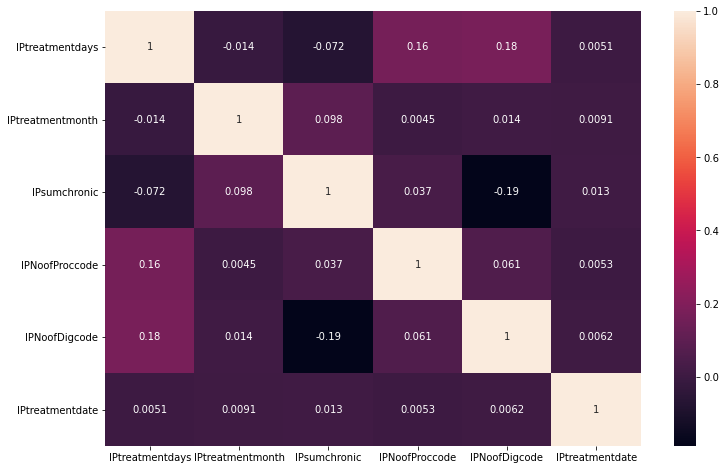

In [78]:
plt.figure(figsize=(12, 8))

fields = ['IPtreatmentdays', 'IPtreatmentmonth','IPsumchronic','IPNoofProccode', 'IPNoofDigcode', 'IPtreatmentdate']

IP_corr = IPdata[fields].corr()
sns.heatmap(IP_corr, 
            xticklabels = IP_corr.columns.values,
            yticklabels = IP_corr.columns.values,
            annot = True);

### Correlation between Numerical features for Outpatient claims

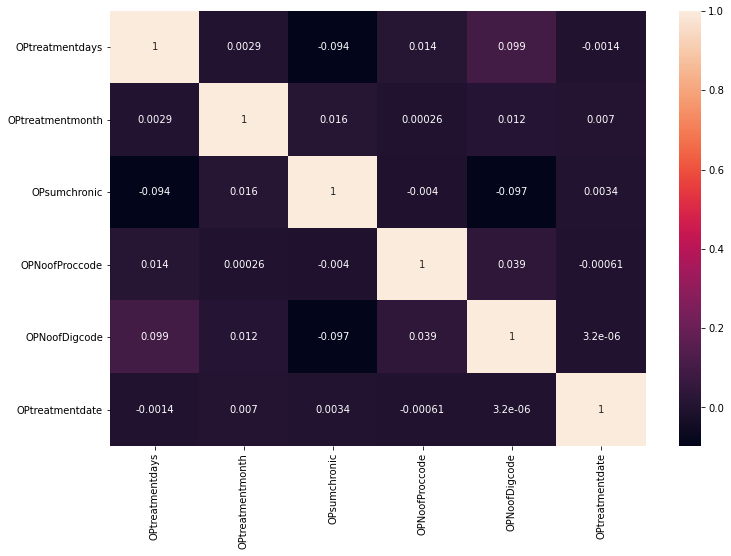

In [79]:
plt.figure(figsize=(12, 8))

fields = ['OPtreatmentdays', 'OPtreatmentmonth','OPsumchronic','OPNoofProccode', 'OPNoofDigcode', 'OPtreatmentdate']

OP_corr = OPdata[fields].corr()
sns.heatmap(OP_corr, 
            xticklabels = OP_corr.columns.values,
            yticklabels = OP_corr.columns.values,
            annot = True);

### Correlation between two categorical features using Theil's U technique

In [90]:
# code reference URL -https://github.com/shakedzy/dython/blob/master/dython/nominal.py
def conditional_entropy(x, y, log_base: float = math.e):
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x, y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0.0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y / p_xy, log_base)
    return entropy

In [91]:
def theils_u(x, y):
    s_xy = conditional_entropy(x, y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n / total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

In [99]:
pp = theils_u(IPdata['providerfraudlabel'], IPdata['IPStateabb'])
pp

0.033458901767427114

#### Observation - State provides decent % of info about provider fraudulent status based on Theil's U test

### Correlation between two categorical features using Chi-Square test

In [101]:
# code reference url - https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/
CrosstabResult=pd.crosstab(index=IPdata['IPStateabb'],columns=IPdata['providerfraudlabel'])
#print(CrosstabResult)

# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.0


#### Observation - As P(0.0) < 0.05, State code feature related to provider fraudulent status

### Correlation between 1 Numerical & 1 categorical feature using ANOVA test

In [102]:
# code reference URL - https://thinkingneuron.com/how-to-measure-the-correlation-between-a-numeric-and-a-categorical-variable-in-python/
IPtreatmentLists=IPdata.groupby('providerfraudlabel')['IPtreatmentdays'].apply(list)

# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value > 0.05
AnovaResults = f_oneway(*IPtreatmentLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.001158818143066236


In [104]:
IPtreatmentLists=IPdata.groupby('providerfraudlabel')['IPtreatmentmonth'].apply(list)

# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value > 0.05
AnovaResults = f_oneway(*IPtreatmentLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.8048262513327527


#### Observation - 

* As P(0.001) < 0.05, IPtreatmentdays feature related to provider fraudulent status
* As P(0.8) > 0.05, IPtreatmentmonth feature is not related to provider fraudulent status

### Splitting dataset into Train & Test 3:1

In [126]:
X=IPdata.drop(['providerfraudlabel'], axis=1).values
Y=IPdata['providerfraudlabel'].values

In [127]:
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, Y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.33)

### Building a random model

In [140]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
   
    B =(C/C.sum(axis=0))
    
    labels = [0,1]
    cmap=sns.light_palette("blue")
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

Log loss on Train Data using Random Model 0.8817158713371714
Log loss on Test Data using Random Model 0.8859817664086723
-------------------- Confusion matrix --------------------


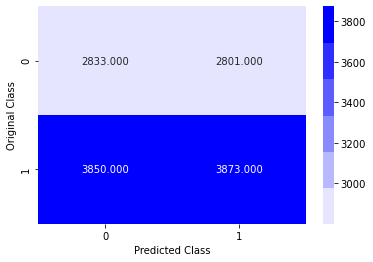

-------------------- Precision matrix (Columm Sum=1) --------------------


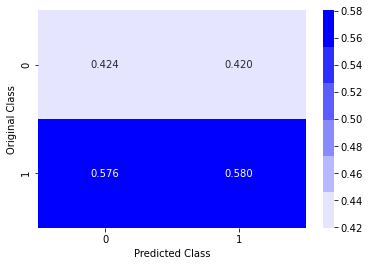

-------------------- Recall matrix (Row sum=1) --------------------


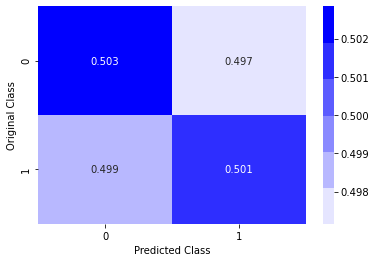

In [141]:
# we need to generate 2 numbers and the sum of numbers should be 1 - code reference- https://stackoverflow.com/a/18662466/4084039
x_train_len = x_train.shape[0]
x_test_len = X_test.shape[0]

x_train_pred_y = np.zeros((x_train_len,2))
for i in range(x_train_len):
    rand_probs = np.random.rand(1,2)
    x_train_pred_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Train Data using Random Model",log_loss(y_train,x_train_pred_y, eps=1e-15))


x_test_pred_y = np.zeros((x_test_len,2))
for i in range(x_test_len):
    rand_probs = np.random.rand(1,2)
    x_test_pred_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,x_test_pred_y, eps=1e-15))

predicted_y =np.argmax(x_test_pred_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

## Final Conclusions/Observation::


1. Overall, the In patient claims fraudulent ratio is higher than Out patient claims
2. Provider who belongs to CA & SD tend to involve more fraudulent cases than other states in US.
3. If there is an OtherPhysician, then fraudulent status would be 50 % for In patient claims
4. Imbalance data- In patient data have more no of fraudulent cases, and Out patient claims have more no of non-fraudulent cases.
5. As Medicare plans mainly serving for 65 +, more fraudulent cases filed for the patient who above age 60. 
6. BeneID, ClaimID, Provider, AttendingPhysician, OperatingPhysician & OtherPhysician - As these are all ID, there is no information out of it and Not useful features. So, we can remove them. 
7. ClmDiagnosisCode - We extracted Diagnosis description and it would be useful feature.
8. NoOfMonths_PartACov & NoOfMonths_PartBCov - Not useful features as its 12 for all claims
9. DeductibleAmtPaid - Not useful feature as its 1068 for all In patient claims
10. most of the features overlapping a lot, but the State code feature somewhat better than other features in predicting potential fraudulent status
11. 65 to 90 - more no of fraudulent cases filed.
12. Gender #1 tend to involve more fraudulent cases than Gender #2
13. The highest fraudulent cases filed at age 75
14. The patient who has age 54 to 70 and Treatment days more than 30 days - tend to involve more fraud cases
15. Age 60 and treatment days > 30, involved more fraudulent.
16. Zero fraudulent cases for out patient claims if treatement days > 20
17. More no of fraudulent cases filed if patient age 65 to 89 & Treatement days < 20 days
18. Log loss on Test Data using Random Model 0.8859817664086723. This worst-case log loss. 